### <font color='blue'>Context</font>

The covid-19 pandemic is causing the deaths of nearly 15 million people worldwide, estimates the World Health Organization (WHO). WHO believes that many countries underestimated the numbers of people who died from covid - so far, only 5,4 million deaths have been officially recorded. These thoughts also take into account deaths that were not directly caused by the coronavirus, but rather the indirect effects of the health situation. This is the case, for example, of people who could not access hospitals to take care of other health problems.
The WHO study also takes into account the poor quality of records in some regions or countries and the lack of a testing policy, especially at the beginning of the crisis there in 2020. Considering all these variables, the entity concluded that most of the 9.5 million extra deaths (beyond the 5.4 million officially recorded) could be interpreted as directly caused by the virus.



### <font color='blue'>Objective of Analysis</font>

The purpose of this analysis is to use the historical dataset on the pandemic caused by Our World in Data up to 02/22/2022 to answer the following questions:

1- Which continent has the highest number of cases of Covid_19? Are there discrepant differences?

2- Describe the proportions of new cases of Covid 19 by continent over the years?

3- What is the year with the highest number of cases of Covid-19?

4- Which continent has the highest number of deaths from Covid_19? Are there discrepant differences?

5- Describe the proportions of deaths by Covid 19 within the Continents over the Years?

6- What has influenced the increase in the number of deaths from covid 19 on the Continent but affected by the pandemic?


### <font color='blue'>Description of the Variables Used in the Analysis</font>

* **new_cases** - New confirmed cases of COVID-19. Counts may include probable cases when reported.

* **new_deaths** - New deaths attributed to COVID-19. Counts may include probable deaths, when reported.

* **icu_patients** - Number of COVID-19 patients in intensive care units (ICUs) on a given day.

* **hosp_patients** - Number of COVID-19 patients in the hospital on a given day.

* **new_tests** - New tests for COVID-19 (calculated for consecutive days only).

* **people_vaccinated** - Total number of people who received at least one dose of vaccine.

* **people_fully_vaccinated** - Total number of people who received all doses prescribed by the initial vaccination protocol.

* **continent** - Continent of geographic location.

* **location** - Geographic location

* **date** - Observation date

* **population** - Population (last values ​​available).

* **median_age** - Average age of the population, UN projection for 2020.

* **extreme_poverty** - Percentage of population living in extreme poverty, most recent year available since 2010.

* **cardiovasc_death_rate** - Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people).

* **diabetes_prevalence** - Prevalence of diabetes (% of population aged 20 to 79 years) in 2017.

* **female_smokers** - Proportion of women who smoke, most recent year available.

* **male_smokers** - Proportion of men who smoke, most recent year available.

* **hospital_beds_per_thousand** - Hospital beds per 1000 people, most recent year available since 2010.

* **life_expectancy** - Life expectancy at birth in 2019.

* **human_development_index** -A composite index measuring average performance in three basic dimensions of human development – ​​a long and healthy life, knowledge, and a decent standard of living.

### <font color='blue'> Importing the libraries that will be used in the analysis </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import missingno as mno
warnings.filterwarnings("ignore")
from scipy import stats

Global chart configuration parameters, to create all charts with the same dimensions

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Loading the Dataset

In [3]:
dados = pd.read_csv('dados/owid-covid-data.csv')

In [4]:
dados.shape

(163787, 67)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163787 entries, 0 to 163786
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    163787 non-null  object 
 1   continent                                   153974 non-null  object 
 2   location                                    163787 non-null  object 
 3   date                                        163787 non-null  object 
 4   total_cases                                 160782 non-null  float64
 5   new_cases                                   160752 non-null  float64
 6   new_cases_smoothed                          159601 non-null  float64
 7   total_deaths                                143041 non-null  float64
 8   new_deaths                                  143220 non-null  float64
 9   new_deaths_smoothed                         143090 non-null  float64
 

In [6]:
dados.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

## Selection of Columns that will be used in the Analysis

In [7]:
    df = dados[['iso_code', 'continent', 'location', 'date', 'new_cases','new_deaths','icu_patients','hosp_patients','stringency_index','new_tests','people_vaccinated',
              'people_fully_vaccinated','population','median_age','gdp_per_capita','extreme_poverty','cardiovasc_death_rate',
             'diabetes_prevalence','female_smokers','male_smokers','hospital_beds_per_thousand','human_development_index',
             'life_expectancy']]

In [8]:
df.shape

(163787, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163787 entries, 0 to 163786
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   iso_code                    163787 non-null  object 
 1   continent                   153974 non-null  object 
 2   location                    163787 non-null  object 
 3   date                        163787 non-null  object 
 4   new_cases                   160752 non-null  float64
 5   new_deaths                  143220 non-null  float64
 6   icu_patients                23028 non-null   float64
 7   hosp_patients               23792 non-null   float64
 8   stringency_index            128676 non-null  float64
 9   new_tests                   66435 non-null   float64
 10  people_vaccinated           41916 non-null   float64
 11  people_fully_vaccinated     39295 non-null   float64
 12  population                  162723 non-null  float64
 13  median_age    

Filtering the Continent column by removing fields with missing values

In [10]:
df = df[df['continent'].notna()]

In [11]:
df.shape

(153974, 23)

In [12]:
df.isna().sum()

iso_code                           0
continent                          0
location                           0
date                               0
new_cases                       3035
new_deaths                     20554
icu_patients                  130946
hosp_patients                 130182
stringency_index               25298
new_tests                      87539
people_vaccinated             117099
people_fully_vaccinated       119558
population                       317
median_age                     18999
gdp_per_capita                 18344
extreme_poverty                64900
cardiovasc_death_rate          20041
diabetes_prevalence            12980
female_smokers                 50296
male_smokers                   51729
hospital_beds_per_thousand     32946
human_development_index        20566
life_expectancy                 1844
dtype: int64

Creating + 2 columns

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df['mounth'] = df['date'].dt.month_name()

In [15]:
df['year'] = df['date'].dt.year

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153974 entries, 0 to 163786
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   iso_code                    153974 non-null  object        
 1   continent                   153974 non-null  object        
 2   location                    153974 non-null  object        
 3   date                        153974 non-null  datetime64[ns]
 4   new_cases                   150939 non-null  float64       
 5   new_deaths                  133420 non-null  float64       
 6   icu_patients                23028 non-null   float64       
 7   hosp_patients               23792 non-null   float64       
 8   stringency_index            128676 non-null  float64       
 9   new_tests                   66435 non-null   float64       
 10  people_vaccinated           36875 non-null   float64       
 11  people_fully_vaccinated     34416 non-n

In [17]:
df.head(10)

,iso_code,continent,location,date,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy,mounth,year
0,AFG,Asia,Afghanistan,2020-02-24,5.0,NaN,NaN,NaN,8.33,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,February,2020
1,AFG,Asia,Afghanistan,2020-02-25,0.0,NaN,NaN,NaN,8.33,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,February,2020
2,AFG,Asia,Afghanistan,2020-02-26,0.0,NaN,NaN,NaN,8.33,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,February,2020
3,AFG,Asia,Afghanistan,2020-02-27,0.0,NaN,NaN,NaN,8.33,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,February,2020
4,AFG,Asia,Afghanistan,2020-02-28,0.0,NaN,NaN,NaN,8.33,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,February,2020
5,AFG,Asia,Afghanistan,2020-02-29,0.0,NaN,NaN,NaN,8.33,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,February,2020
6,AFG,Asia,Afghanistan,2020-03-01,0.0,NaN,NaN,NaN,27.78,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,March,2020
7,AFG,Asia,Afghanistan,2020-03-02,0.0,NaN,NaN,NaN,27.78,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,March,2020
8,AFG,Asia,Afghanistan,2020-03-03,0.0,NaN,NaN,NaN,27.78,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,March,2020
9,AFG,Asia,Afghanistan,2020-03-04,0.0,NaN,NaN,NaN,27.78,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,March,2020


In [18]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'new_cases', 'new_deaths',
       'icu_patients', 'hosp_patients', 'stringency_index', 'new_tests',
       'people_vaccinated', 'people_fully_vaccinated', 'population',
       'median_age', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'human_development_index',
       'life_expectancy', 'mounth', 'year'],
      dtype='object')

In [19]:
df.shape

(153974, 25)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153974 entries, 0 to 163786
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   iso_code                    153974 non-null  object        
 1   continent                   153974 non-null  object        
 2   location                    153974 non-null  object        
 3   date                        153974 non-null  datetime64[ns]
 4   new_cases                   150939 non-null  float64       
 5   new_deaths                  133420 non-null  float64       
 6   icu_patients                23028 non-null   float64       
 7   hosp_patients               23792 non-null   float64       
 8   stringency_index            128676 non-null  float64       
 9   new_tests                   66435 non-null   float64       
 10  people_vaccinated           36875 non-null   float64       
 11  people_fully_vaccinated     34416 non-n

## <font color='blue'> Separation of categorical and numeric variables </font>

List of categorical columns

In [21]:
cats = ['iso_code','continent','location']

List of numeric columns

In [22]:
nums =  ['new_cases','new_deaths','icu_patients','hosp_patients','stringency_index','new_tests','people_vaccinated',
        'people_fully_vaccinated','population','median_age','gdp_per_capita','extreme_poverty','cardiovasc_death_rate',
        'diabetes_prevalence','female_smokers','male_smokers','hospital_beds_per_thousand','human_development_index',
        'life_expectancy']

## <font color='blue'> Exploring Numerical Variables </font>

In [23]:
df[nums].describe()

,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,people_vaccinated,people_fully_vaccinated,population,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy
count,1.509390e+05,133420.000000,23028.000000,23792.00000,128676.000000,6.643500e+04,3.687500e+04,3.441600e+04,1.536570e+05,134975.000000,135630.000000,89074.000000,133933.000000,140994.000000,103678.000000,102245.000000,121028.000000,133408.000000,152130.000000
mean,2.825089e+03,44.066729,913.918404,4140.03001,54.652130,6.777668e+04,1.637700e+07,1.272285e+07,3.792979e+07,30.569465,19674.384606,13.605416,260.324347,8.207723,10.658944,32.763229,3.030277,0.725564,73.582253
std,1.779699e+04,195.542817,2698.310262,11780.13702,20.423222,2.160539e+05,6.547019e+07,5.100509e+07,1.455752e+08,9.127872,20704.756088,20.102616,120.168156,4.505739,10.592278,13.571551,2.458134,0.150397,7.510735
min,-7.434700e+04,-3933.000000,0.000000,0.00000,0.000000,1.000000e+00,0.000000e+00,1.000000e+00,4.700000e+01,15.100000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,0.100000,0.394000,53.280000
25%,0.000000e+00,0.000000,28.000000,124.00000,40.740000,2.460000e+03,2.932490e+05,2.036755e+05,8.960050e+05,22.200000,4449.898000,0.600000,168.711000,5.310000,1.900000,21.600000,1.300000,0.602000,69.020000
50%,6.000000e+01,1.000000,152.000000,666.00000,54.630000,9.583000e+03,1.898729e+06,1.454122e+06,6.896655e+06,29.700000,12951.839000,2.200000,243.811000,7.170000,6.300000,31.400000,2.397000,0.744000,75.050000
75%,7.510000e+02,13.000000,608.000000,2631.00000,70.830000,3.852600e+04,8.325492e+06,6.679070e+06,2.705363e+07,39.100000,27936.896000,21.400000,331.430000,10.430000,19.300000,41.300000,4.000000,0.845000,78.950000
max,1.368120e+06,4614.000000,28891.000000,154536.00000,100.000000,3.740296e+06,1.266426e+09,1.228340e+09,1.444216e+09,48.200000,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,13.800000,0.957000,86.750000


## Bivariate Analysis - Correlation Map

In [24]:
corr_df = df[nums].corr()

In [25]:
corr_df

,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,people_vaccinated,people_fully_vaccinated,population,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy
new_cases,1.000000,0.607376,0.642269,0.724109,0.062411,0.656883,0.318813,0.307388,0.234207,0.113034,0.084680,-0.083032,-0.086898,0.001875,0.092542,-0.035371,0.032205,0.122295,0.079515
new_deaths,0.607376,1.000000,0.850836,0.858042,0.127738,0.597282,0.275235,0.220568,0.297858,0.113491,0.062473,-0.114903,-0.076672,0.027375,0.076318,-0.032789,0.015492,0.124333,0.077695
icu_patients,0.642269,0.850836,1.000000,0.961366,0.177066,0.722711,0.672784,0.639630,0.836223,-0.060628,0.053004,0.062769,-0.060013,0.164970,0.048294,-0.089682,-0.052846,0.060743,-0.098358
hosp_patients,0.724109,0.858042,0.961366,1.000000,0.190244,0.735802,0.667713,0.643304,0.808435,-0.017646,0.025733,0.135765,-0.064172,0.153874,0.022637,-0.062048,-0.057660,0.020040,-0.046751
stringency_index,0.062411,0.127738,0.177066,0.190244,1.000000,0.062100,0.052718,0.045103,0.103543,0.091380,0.020726,-0.225074,-0.082642,0.084656,-0.047782,0.026413,-0.020351,0.152804,0.126413
new_tests,0.656883,0.597282,0.722711,0.735802,0.062100,1.000000,0.599745,0.565331,0.593315,0.114307,0.146720,-0.060297,-0.081832,0.081841,0.082161,-0.051228,-0.014141,0.133091,0.094658
people_vaccinated,0.318813,0.275235,0.672784,0.667713,0.052718,0.599745,1.000000,0.950489,0.777808,-0.016655,-0.038399,0.048286,-0.010677,0.070498,-0.087152,-0.068105,-0.084838,-0.042015,-0.045642
people_fully_vaccinated,0.307388,0.220568,0.639630,0.643304,0.045103,0.565331,0.950489,1.000000,0.676595,0.003460,-0.012413,0.022316,-0.027367,0.063362,-0.069241,-0.044776,-0.047833,-0.016620,-0.021936
population,0.234207,0.297858,0.836223,0.808435,0.103543,0.593315,0.777808,0.676595,1.000000,0.028820,-0.057161,-0.037268,-0.000550,0.013824,-0.124613,0.026194,-0.038999,-0.019270,-0.027248
median_age,0.113034,0.113491,-0.060628,-0.017646,0.091380,0.114307,-0.016655,0.003460,0.028820,1.000000,0.638929,-0.697849,-0.338572,0.155653,0.658501,0.188310,0.658658,0.898903,0.848006


## From the *correlation map* above, it can be seen that:

* There is a strong positive correlation between `new cases` and `total cases` which indicates multicollinity (2 variables containing the same information)

## <font color='blue'> Exploring Categorical Variables </font>

In [26]:
df[cats].describe()

,iso_code,continent,location
count,153974,153974,153974
unique,225,6,225
top,MEX,Africa,Mexico
freq,784,38812,784


## Some observations:

    *For the Continent variable Africa is the ruling class.
    *For the Location variable Taiwan is the ruling class.
    *All unique values ​​for each category are around 6-215 unique values

# <font color='blue'> Answering Questions </font>

## <font color='blue'> 1- Which continent has the highest number of cases of Covid_19? Are there discrepant differences? </font>

Grouping data for analysis

In [27]:
df_report1 = df.groupby(['continent'])['new_cases'].sum().reset_index()
df_report1.head()

,continent,new_cases
0,Africa,11168899.0
1,Asia,112796185.0
2,Europe,153250440.0
3,North America,92469987.0
4,Oceania,3363795.0


Adjusting column names

In [28]:
df_report1.columns = ['Continente', 'Total']
df_report1.head()

,Continente,Total
0,Africa,11168899.0
1,Asia,112796185.0
2,Europe,153250440.0
3,North America,92469987.0
4,Oceania,3363795.0


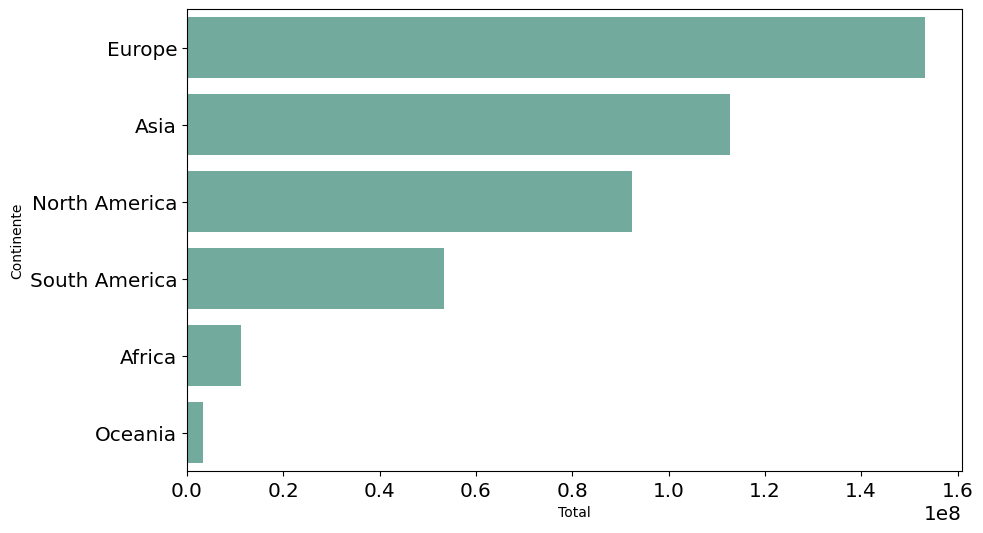

In [29]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Reorder this data frame
dfplot = df_report1.sort_values(['Total'], ascending=False).reset_index(drop=True)

# Make a barplot
sns.barplot(
    y="Continente", 
     x="Total", 
    data=dfplot, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

## From the graph it can be seen that:

* The European continent has the highest number of cases of covid_19, compared to other continents it is clear that the differences are high.

## <font color='blue'> 2- Describe the proportions of new cases of Covid 19 by continent over the years? </font>

In [30]:
df_report3 = df.groupby(['year','continent'])['new_cases'].sum().reset_index()
df_report3

,year,continent,new_cases
0,2020,Africa,2760454.0
1,2020,Asia,19892098.0
2,2020,Europe,23927287.0
3,2020,North America,23175122.0
4,2020,Oceania,48408.0
5,2020,South America,13199247.0
6,2021,Africa,6977128.0
7,2021,Asia,64207827.0
8,2021,Europe,65116826.0
9,2021,North America,41804642.0


In [31]:
df_report3a = df.groupby(['continent'])['new_cases'].sum().reset_index()
df_report3a

,continent,new_cases
0,Africa,11168899.0
1,Asia,112796185.0
2,Europe,153250440.0
3,North America,92469987.0
4,Oceania,3363795.0
5,South America,53366799.0


In [32]:
df_reportdf = df_report3.merge(df_report3a, on = 'continent')
df_reportdf

,year,continent,new_cases_x,new_cases_y
0,2020,Africa,2760454.0,11168899.0
1,2021,Africa,6977128.0,11168899.0
2,2022,Africa,1431317.0,11168899.0
3,2020,Asia,19892098.0,112796185.0
4,2021,Asia,64207827.0,112796185.0
5,2022,Asia,28696260.0,112796185.0
6,2020,Europe,23927287.0,153250440.0
7,2021,Europe,65116826.0,153250440.0
8,2022,Europe,64206327.0,153250440.0
9,2020,North America,23175122.0,92469987.0


In [33]:
df_reportdf['Percentual(%)'] = df_reportdf['new_cases_x'] / df_reportdf['new_cases_y'] * 100
df_reportdf.columns = ['Ano', 
                      'Continente', 
                      'Casos por Ano', 
                      'Total Casos', 
                      'Percentual(%)']
df_reportdf

,Ano,Continente,Casos por Ano,Total Casos,Percentual(%)
0,2020,Africa,2760454.0,11168899.0,24.715543
1,2021,Africa,6977128.0,11168899.0,62.469255
2,2022,Africa,1431317.0,11168899.0,12.815202
3,2020,Asia,19892098.0,112796185.0,17.635435
4,2021,Asia,64207827.0,112796185.0,56.923758
5,2022,Asia,28696260.0,112796185.0,25.440807
6,2020,Europe,23927287.0,153250440.0,15.613193
7,2021,Europe,65116826.0,153250440.0,42.490466
8,2022,Europe,64206327.0,153250440.0,41.896341
9,2020,North America,23175122.0,92469987.0,25.062318


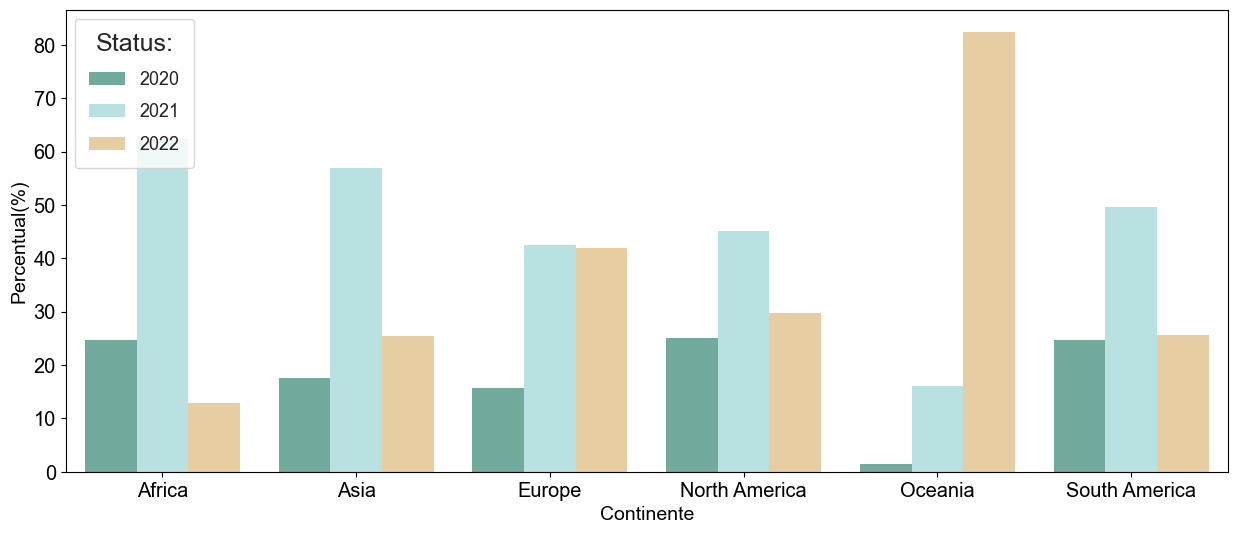

In [34]:
plt.figure(figsize = (15,6))
chart = sns.barplot(x = 'Continente', 
                    y = 'Percentual(%)', 
                    data = df_reportdf, 
                    hue = 'Ano',
                    palette = ["#69b3a2","#B2E7E8",'#F2D096'])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Continente", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 0.8, 
           labelspacing = 0.8, 
           fontsize = 13, 
           title = 'Status:')


## From the graph it can be seen that:

* The year 2021 has the highest number of new cases of covid-19 compared to other years, with the exception of Oceania, which had the peak of new cases of covid-19 in 2022.

## <font color='blue'> 3- What is the year with the highest number of cases of Covid-19? </font>

In [35]:
df_report2 = df.groupby(['year'])['new_cases'].sum().reset_index()
df_report2.head()

,year,new_cases
0,2020,83002616.0
1,2021,205095114.0
2,2022,138318375.0


In [36]:
df_report2.columns = ['Ano', 'Total']
df_report2.head()

,Ano,Total
0,2020,83002616.0
1,2021,205095114.0
2,2022,138318375.0


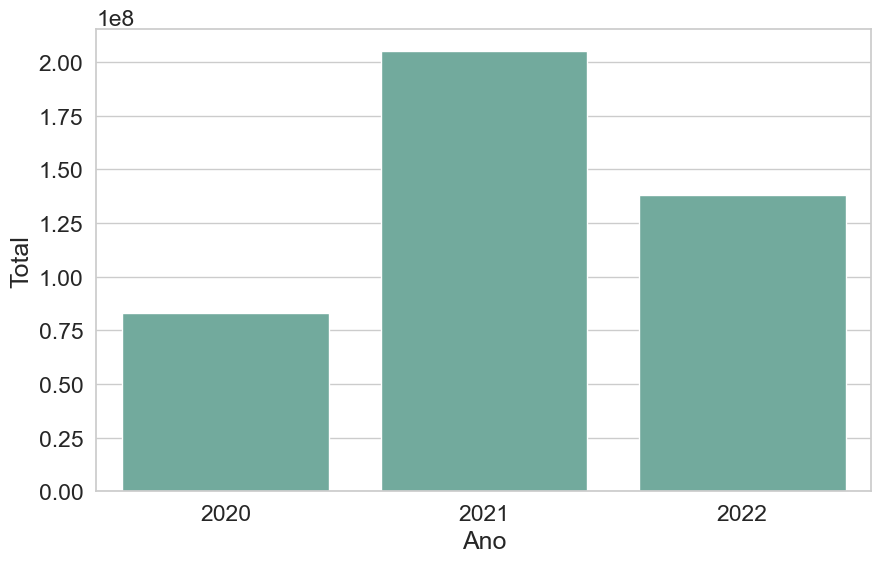

In [37]:
plt.figure(figsize=(10, 6))


dfplt2 = df_report2.sort_values(['Total'], ascending=False).reset_index(drop=True)

# Make a barplot
sns.barplot(
    y="Total", 
     x="Ano", 
    data=dfplt2, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

## <font color='blue'> 4- Which continent has the highest number of deaths from Covid_19? Are there discrepant differences? </font>

In [38]:
df_report4 = df.groupby(['continent'])['new_deaths'].sum().reset_index()
df_report4.head()

,continent,new_deaths
0,Africa,246875.0
1,Asia,1334821.0
2,Europe,1693983.0
3,North America,1357912.0
4,Oceania,7577.0


In [39]:
df_report4.columns = ['Continente', 'Total']
df_report4.head()

,Continente,Total
0,Africa,246875.0
1,Asia,1334821.0
2,Europe,1693983.0
3,North America,1357912.0
4,Oceania,7577.0


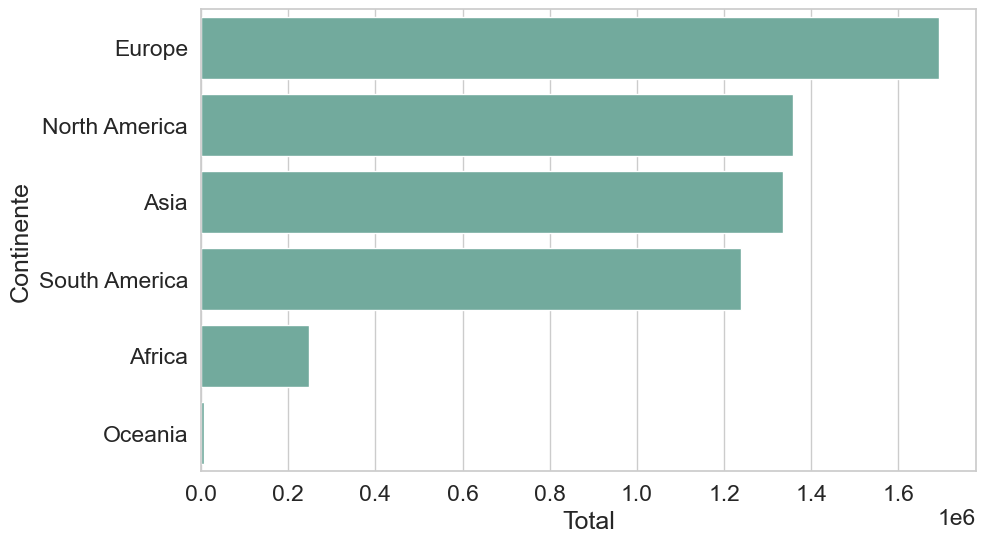

In [40]:
plt.figure(figsize=(10, 6))


dfplot3 = df_report4.sort_values(['Total'], ascending=False).reset_index(drop=True)


sns.barplot(
    y="Continente", 
     x="Total", 
    data=dfplot3, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

## From the graph it can be seen that:

* The European continent has the highest number of deaths from covid_19, comparing with other continents it is clear that the differences are high. From this analysis, we can identify a positive correlation between the number of new cases and the number of deaths, that is, as cases of covid increase, deaths also tend to increase.

## <font color='blue'> 5- Describe the proportions of deaths by Covid 19 within the Continents over the Years? </font>

In [41]:
df_report5 = df.groupby(['year','continent'])['new_deaths'].sum().reset_index()
df_report5

,year,continent,new_deaths
0,2020,Africa,65468.0
1,2020,Asia,337835.0
2,2020,Europe,545550.0
3,2020,North America,512685.0
4,2020,Oceania,1059.0
5,2020,South America,414312.0
6,2021,Africa,162985.0
7,2021,Asia,914438.0
8,2021,Europe,984465.0
9,2021,North America,707618.0


In [42]:
df_report5a = df.groupby(['continent'])['new_deaths'].sum().reset_index()
df_report5a

,continent,new_deaths
0,Africa,246875.0
1,Asia,1334821.0
2,Europe,1693983.0
3,North America,1357912.0
4,Oceania,7577.0
5,South America,1238215.0


In [43]:
df_reportdf1 = df_report5.merge(df_report5a, on = 'continent')
df_reportdf1

,year,continent,new_deaths_x,new_deaths_y
0,2020,Africa,65468.0,246875.0
1,2021,Africa,162985.0,246875.0
2,2022,Africa,18422.0,246875.0
3,2020,Asia,337835.0,1334821.0
4,2021,Asia,914438.0,1334821.0
5,2022,Asia,82548.0,1334821.0
6,2020,Europe,545550.0,1693983.0
7,2021,Europe,984465.0,1693983.0
8,2022,Europe,163968.0,1693983.0
9,2020,North America,512685.0,1357912.0


In [44]:
df_reportdf1['Percentual(%)'] = df_reportdf1['new_deaths_x'] / df_reportdf1['new_deaths_y'] * 100
df_reportdf1.columns = ['Ano', 
                      'Continente', 
                      'Mortes por Ano', 
                      'Total Mortes', 
                      'Percentual(%)']
df_reportdf1

,Ano,Continente,Mortes por Ano,Total Mortes,Percentual(%)
0,2020,Africa,65468.0,246875.0,26.518684
1,2021,Africa,162985.0,246875.0,66.019241
2,2022,Africa,18422.0,246875.0,7.462076
3,2020,Asia,337835.0,1334821.0,25.309386
4,2021,Asia,914438.0,1334821.0,68.506414
5,2022,Asia,82548.0,1334821.0,6.184200
6,2020,Europe,545550.0,1693983.0,32.205164
7,2021,Europe,984465.0,1693983.0,58.115400
8,2022,Europe,163968.0,1693983.0,9.679436
9,2020,North America,512685.0,1357912.0,37.755392


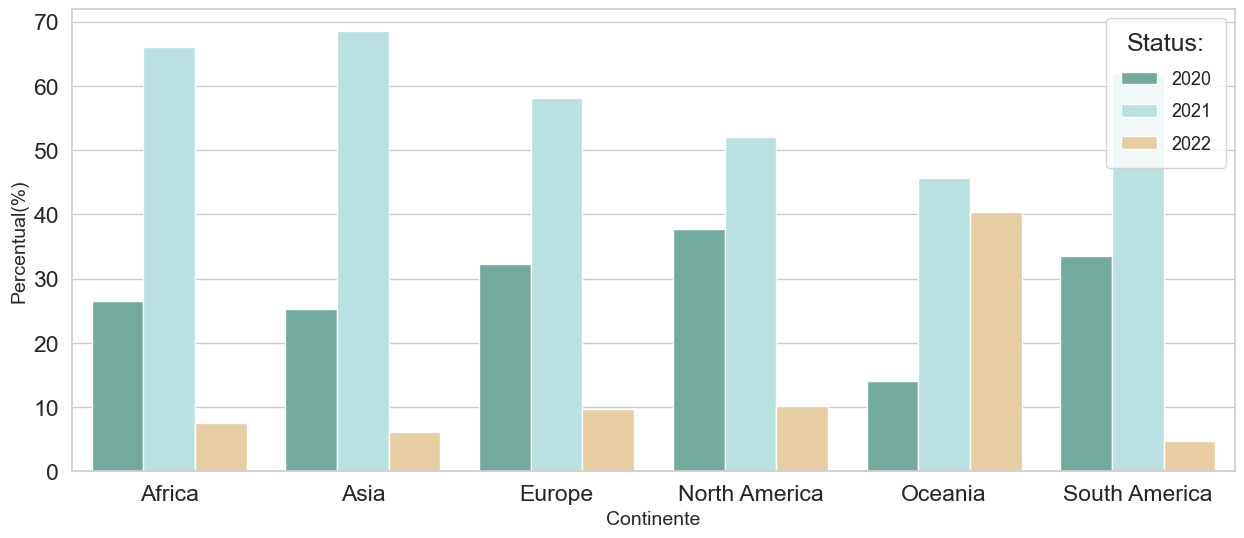

In [45]:
plt.figure(figsize = (15,6))
chart = sns.barplot(x = 'Continente', 
                    y = 'Percentual(%)', 
                    data = df_reportdf1, 
                    hue = 'Ano',
                    palette = ["#69b3a2","#B2E7E8",'#F2D096'])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Continente", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 0.8, 
           labelspacing = 0.8, 
           fontsize = 13, 
           title = 'Status:')


## From the graph it can be seen that:

* The year 2021 has the highest number of deaths from covid-19 compared to other years.

## <font color='red'> Note </font>


From the analyzes carried out above, it can be seen that the European continent has the highest number of covid 19 cases and also the highest number of deaths caused by covid. Hence the following question arises:


## <font color='blue'> 6- What has influenced the increase in the number of deaths from covid 19 on the European continent? </font>

Now let's apply a Filter to the dataframe looking only for data from the European continent

In [46]:
dfeurope = df[(df.continent == 'Europe')]

In [47]:
dfeurope.shape

(36528, 25)

Checking the total number of missing values

In [48]:
dfeurope.isna().sum()

iso_code                          0
continent                         0
location                          0
date                              0
new_cases                       862
new_deaths                     3064
icu_patients                  20320
hosp_patients                 17215
stringency_index               4478
new_tests                     12520
people_vaccinated             23566
people_fully_vaccinated       23856
population                        0
median_age                     7202
gdp_per_capita                 5766
extreme_poverty               14590
cardiovasc_death_rate          6479
diabetes_prevalence            4308
female_smokers                 7207
male_smokers                   7207
hospital_beds_per_thousand     5031
human_development_index        5758
life_expectancy                1442
mounth                            0
year                              0
dtype: int64

<AxesSubplot:>

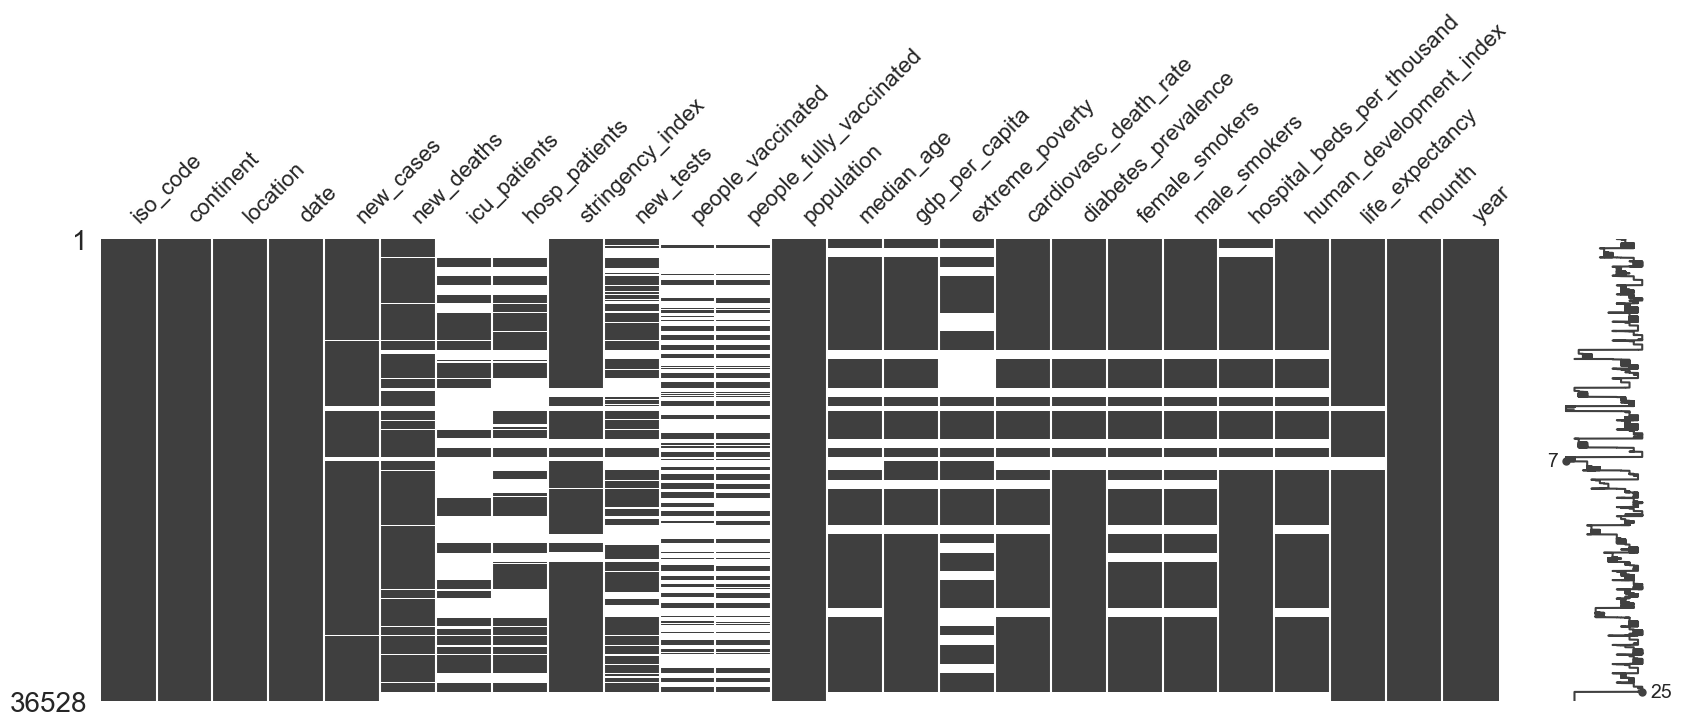

In [49]:
mno.matrix(dfeurope, figsize = (20, 6))

## <font color='blue'> Applying the various imputation techniques of replacing missing values ​​</font>

Applying the filter on the 'new_deaths' variable removing the Missing values

In [50]:
dfeurope = dfeurope[dfeurope['new_deaths'].notna()]

In [51]:
dfeurope.isna().sum()

iso_code                          0
continent                         0
location                          0
date                              0
new_cases                         7
new_deaths                        0
icu_patients                  17383
hosp_patients                 14331
stringency_index               2731
new_tests                      9745
people_vaccinated             20596
people_fully_vaccinated       20887
population                        0
median_age                     5091
gdp_per_capita                 3664
extreme_poverty               12224
cardiovasc_death_rate          4388
diabetes_prevalence            2277
female_smokers                 5091
male_smokers                   5091
hospital_beds_per_thousand     2980
human_development_index        3698
life_expectancy                 702
mounth                            0
year                              0
dtype: int64

Applying the filter on the 'icu_patients' variable looking for the NA values

In [52]:
icu_patients = dfeurope[dfeurope['icu_patients'].isna()]

In [53]:
icu_patients.shape

(17383, 25)

checking the year that has the highest number of missing values

In [54]:
icu_patients['year'].value_counts()

2021    8871
2020    7070
2022    1442
Name: year, dtype: int64

Checking the number of missing values ​​by country

In [55]:
icu_patients['location'].value_counts()

San Marino                725
Albania                   714
Greece                    714
Poland                    713
Ukraine                   712
Norway                    711
Hungary                   710
Russia                    706
Croatia                   706
Moldova                   706
Bosnia and Herzegovina    704
Iceland                   704
North Macedonia           703
Andorra                   703
Montenegro                702
Kosovo                    702
Lithuania                 701
Monaco                    696
Belarus                   694
Isle of Man               693
Latvia                    691
Liechtenstein             690
Gibraltar                 469
Faeroe Islands            413
Slovakia                  254
Finland                   192
Spain                     152
Romania                    75
Malta                      68
Bulgaria                   35
Estonia                    33
France                     32
United Kingdom             28
Ireland   

Applying the imputation technique of replacing missing values ​​with zero

In [56]:
dfeurope['icu_patients'] = dfeurope['icu_patients'].fillna(0)
dfeurope['hosp_patients'] = dfeurope['hosp_patients'].fillna(0)
dfeurope['new_tests'] = dfeurope['new_tests'].fillna(0)
dfeurope['new_cases'] = dfeurope['new_cases'].fillna(0)
dfeurope['people_vaccinated'] = dfeurope['people_vaccinated'].fillna(0)
dfeurope['people_fully_vaccinated'] = dfeurope['people_fully_vaccinated'].fillna(0)

Applying the filter on the 'median_age' variable looking for Missing values

In [57]:
median_age = dfeurope[dfeurope['median_age'].isna()]

checking the number of missing values ​​by country

In [58]:
median_age['location'].value_counts()

San Marino        725
Andorra           703
Kosovo            702
Monaco            696
Isle of Man       693
Liechtenstein     690
Gibraltar         469
Faeroe Islands    413
Name: location, dtype: int64

Applying the imputation technique of replacing the missing values ​​with the real value of the mean age by country(fonte:Google)

In [59]:
dfeurope.loc[dfeurope['location'] == 'San Marino', 'median_age'] = 45
dfeurope.loc[dfeurope['location'] == 'Andorra', 'median_age'] = 46
dfeurope.loc[dfeurope['location'] == 'Kosovo', 'median_age'] = 30
dfeurope.loc[dfeurope['location'] == 'Monaco', 'median_age'] = 53
dfeurope.loc[dfeurope['location'] == 'Isle of Man', 'median_age'] = 43
dfeurope.loc[dfeurope['location'] == 'Gibraltar', 'median_age'] = 33
dfeurope.loc[dfeurope['location'] == 'Faeroe Islands', 'median_age'] = 37
dfeurope.loc[dfeurope['location'] == 'Liechtenstein', 'median_age'] = 43

In [60]:
dfeurope.isna().sum()

iso_code                          0
continent                         0
location                          0
date                              0
new_cases                         0
new_deaths                        0
icu_patients                      0
hosp_patients                     0
stringency_index               2731
new_tests                         0
people_vaccinated                 0
people_fully_vaccinated           0
population                        0
median_age                        0
gdp_per_capita                 3664
extreme_poverty               12224
cardiovasc_death_rate          4388
diabetes_prevalence            2277
female_smokers                 5091
male_smokers                   5091
hospital_beds_per_thousand     2980
human_development_index        3698
life_expectancy                 702
mounth                            0
year                              0
dtype: int64

In [61]:
gdp_per_capita = dfeurope[dfeurope['gdp_per_capita'].isna()]

Checking the number of missing values ​​by country

In [62]:
gdp_per_capita['location'].value_counts()

Andorra           703
Monaco            696
Isle of Man       693
Liechtenstein     690
Gibraltar         469
Faeroe Islands    413
Name: location, dtype: int64

Applying the imputation technique of replacing missing values ​​with the real value of GDP per capita(fonte:google)

In [63]:
dfeurope.loc[dfeurope['location'] == 'Andorra', 'gdp_per_capita'] = 40897
dfeurope.loc[dfeurope['location'] == 'Monaco', 'gdp_per_capita'] = 190512
dfeurope.loc[dfeurope['location'] == 'Isle of Man', 'gdp_per_capita'] = 89112
dfeurope.loc[dfeurope['location'] == 'Liechtenstein', 'gdp_per_capita'] = 180366
dfeurope.loc[dfeurope['location'] == 'Gibraltar', 'gdp_per_capita'] = 92843
dfeurope.loc[dfeurope['location'] == 'Faeroe Islands', 'gdp_per_capita'] = 64225

In [64]:
dfeurope.isna().sum()

iso_code                          0
continent                         0
location                          0
date                              0
new_cases                         0
new_deaths                        0
icu_patients                      0
hosp_patients                     0
stringency_index               2731
new_tests                         0
people_vaccinated                 0
people_fully_vaccinated           0
population                        0
median_age                        0
gdp_per_capita                    0
extreme_poverty               12224
cardiovasc_death_rate          4388
diabetes_prevalence            2277
female_smokers                 5091
male_smokers                   5091
hospital_beds_per_thousand     2980
human_development_index        3698
life_expectancy                 702
mounth                            0
year                              0
dtype: int64

Analyzing the averages of the variables

In [65]:
dfeurope.describe()

,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,people_vaccinated,people_fully_vaccinated,population,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy,year
count,33464.000000,33464.000000,33464.000000,33464.000000,30733.000000,3.346400e+04,3.346400e+04,3.346400e+04,3.346400e+04,33464.000000,33464.000000,21240.000000,29076.000000,31187.000000,28373.000000,28373.000000,30484.000000,29766.000000,32762.000000,33464.000000
mean,4575.153060,50.621055,254.590396,1693.336421,53.739280,5.336600e+04,3.168993e+06,2.654365e+06,1.605334e+07,42.047992,42264.499313,0.903362,229.369877,6.549469,23.406207,35.542586,5.155817,0.880117,79.886764,2020.675203
std,18073.684345,140.976838,720.417050,4736.246361,16.396363,1.594842e+05,1.036603e+07,9.059426e+06,2.792702e+07,3.633179,35915.237002,1.274332,124.925340,1.988351,7.586083,10.523102,2.369142,0.056579,3.511886,0.609245
min,-74347.000000,-3933.000000,0.000000,0.000000,5.560000,0.000000e+00,0.000000e+00,0.000000e+00,3.369100e+04,30.000000,5189.972000,0.100000,86.060000,3.280000,5.900000,15.200000,2.220000,0.750000,71.900000,2020.000000
25%,36.000000,0.000000,0.000000,0.000000,41.670000,0.000000e+00,0.000000e+00,0.000000e+00,1.325188e+06,39.700000,23313.199000,0.200000,122.137000,4.910000,19.600000,27.300000,3.320000,0.829000,76.880000,2020.000000
50%,402.000000,5.000000,0.000000,39.000000,51.850000,4.986000e+03,0.000000e+00,0.000000e+00,5.465629e+06,42.500000,32605.906000,0.500000,168.711000,5.810000,23.000000,34.800000,4.510000,0.892000,81.320000,2021.000000
75%,2268.250000,30.000000,119.000000,843.250000,65.740000,2.861250e+04,5.691608e+05,4.407318e+05,1.072455e+07,44.000000,46682.515000,1.000000,329.635000,7.770000,28.400000,44.400000,6.620000,0.931000,82.400000,2021.000000
max,502507.000000,4614.000000,7019.000000,39255.000000,100.000000,2.945871e+06,7.828428e+07,7.160191e+07,1.459120e+08,53.000000,190512.000000,5.700000,539.849000,10.080000,44.000000,58.300000,13.800000,0.957000,86.750000,2022.000000


Applying the imputation technique of replacing missing values ​​with the means of each variable

In [66]:
dfeurope['extreme_poverty'] = dfeurope['extreme_poverty'].fillna(0.90)
dfeurope['cardiovasc_death_rate'] = dfeurope['cardiovasc_death_rate'].fillna(229)
dfeurope['diabetes_prevalence'] = dfeurope['diabetes_prevalence'].fillna(6.5)
dfeurope['female_smokers'] = dfeurope['female_smokers'].fillna(23)
dfeurope['male_smokers'] = dfeurope['male_smokers'].fillna(35)
dfeurope['hospital_beds_per_thousand'] = dfeurope['hospital_beds_per_thousand'].fillna(5)
dfeurope['human_development_index'] = dfeurope['human_development_index'].fillna(0.8)
dfeurope['life_expectancy'] = dfeurope['life_expectancy'].fillna(79)
dfeurope['stringency_index'] = dfeurope['stringency_index'].fillna(53.7)

In [67]:
dfeurope.isna().sum()

iso_code                      0
continent                     0
location                      0
date                          0
new_cases                     0
new_deaths                    0
icu_patients                  0
hosp_patients                 0
stringency_index              0
new_tests                     0
people_vaccinated             0
people_fully_vaccinated       0
population                    0
median_age                    0
gdp_per_capita                0
extreme_poverty               0
cardiovasc_death_rate         0
diabetes_prevalence           0
female_smokers                0
male_smokers                  0
hospital_beds_per_thousand    0
human_development_index       0
life_expectancy               0
mounth                        0
year                          0
dtype: int64

<AxesSubplot:>

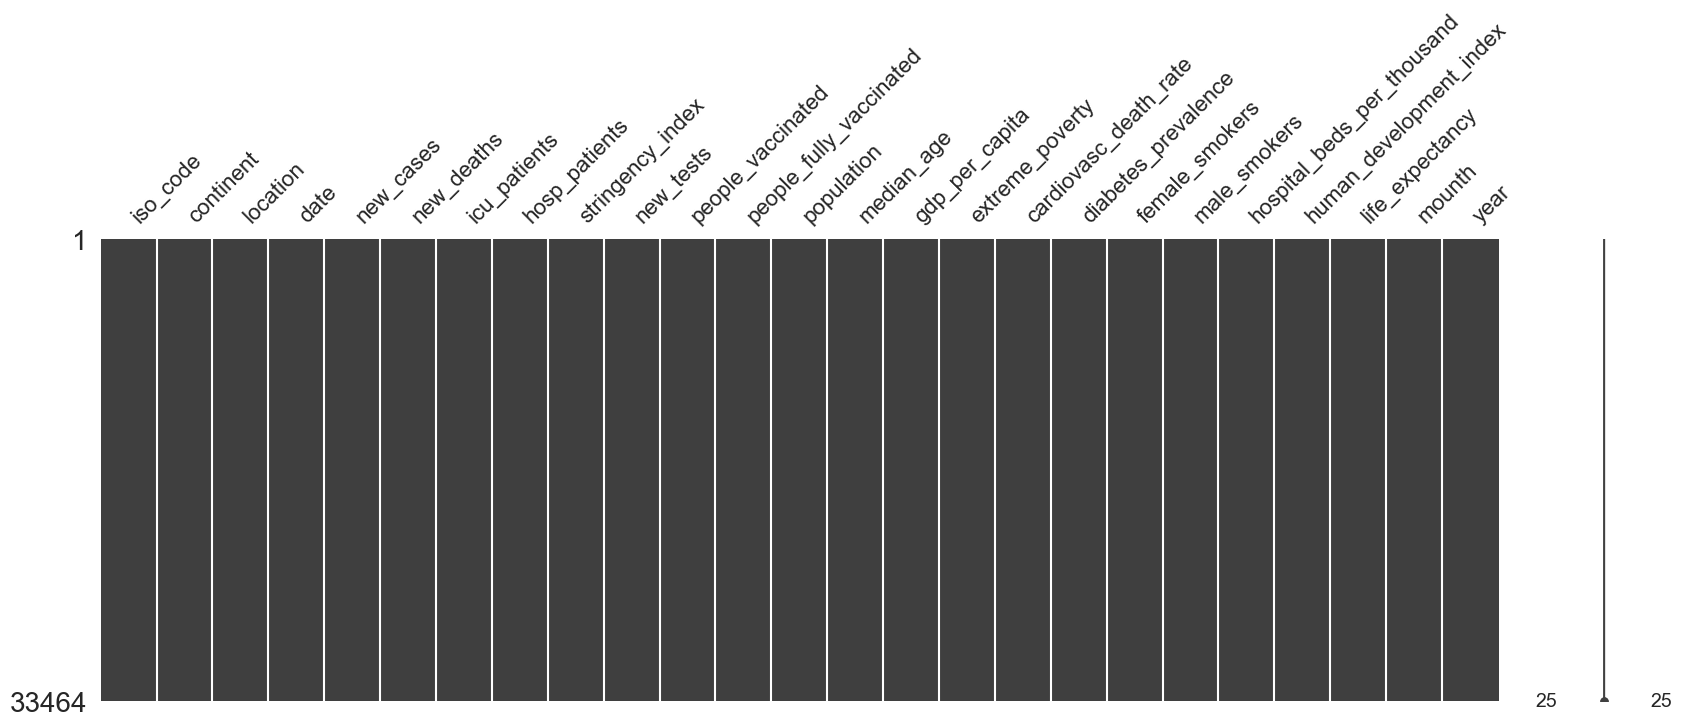

In [68]:
mno.matrix(dfeurope, figsize = (20, 6))

## <font color='blue'> Correlation Map </font>

In [69]:
corr_dfeurope = dfeurope.corr()

In [70]:
corr_dfeurope

,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,people_vaccinated,people_fully_vaccinated,population,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy,year
new_cases,1.000000,0.346012,0.366782,0.378964,0.087521,0.498335,0.501399,0.526340,0.348571,0.064214,-0.048299,-0.015441,-0.081854,-0.073106,0.039321,-0.014584,0.018226,0.098810,0.024931,0.243986
new_deaths,0.346012,1.000000,0.485349,0.508503,0.219763,0.245998,0.315051,0.293222,0.608703,0.058759,-0.116370,-0.003794,0.074478,-0.059658,0.022735,0.127368,0.123073,0.007341,-0.141640,0.058668
icu_patients,0.366782,0.485349,1.000000,0.674870,0.319485,0.307770,0.319821,0.290864,0.444157,0.204268,-0.040515,0.106894,-0.249262,-0.051323,0.134383,-0.117642,0.022183,0.221010,0.179093,0.044263
hosp_patients,0.378964,0.508503,0.674870,1.000000,0.269100,0.407439,0.229280,0.208610,0.348194,0.135123,-0.079556,0.025471,-0.197005,-0.170394,0.103256,-0.116180,-0.045436,0.132487,0.124660,0.053633
stringency_index,0.087521,0.219763,0.319485,0.269100,1.000000,0.115714,0.052305,0.030879,0.190598,0.091110,-0.044580,0.074596,-0.138769,0.024473,0.054984,0.006004,-0.056574,0.070265,0.095313,-0.200014
new_tests,0.498335,0.245998,0.307770,0.407439,0.115714,1.000000,0.531256,0.494745,0.425347,0.050124,-0.049201,-0.064501,-0.186149,-0.184894,0.019913,-0.088127,-0.079462,0.175716,0.087012,0.170447
people_vaccinated,0.501399,0.315051,0.319821,0.229280,0.052305,0.531256,1.000000,0.974732,0.533934,0.103368,-0.051429,-0.026590,-0.119494,-0.099327,0.046424,-0.020491,0.031292,0.145392,0.044305,0.263756
people_fully_vaccinated,0.526340,0.293222,0.290864,0.208610,0.030879,0.494745,0.974732,1.000000,0.493858,0.105151,-0.052277,-0.005401,-0.106868,-0.078694,0.044872,-0.016709,0.035594,0.131762,0.037985,0.269147
population,0.348571,0.608703,0.444157,0.348194,0.190598,0.425347,0.533934,0.493858,1.000000,0.107559,-0.152812,-0.045247,0.036600,-0.103003,0.031089,0.150911,0.185691,0.095664,-0.149404,-0.016538
median_age,0.064214,0.058759,0.204268,0.135123,0.091110,0.050124,0.103368,0.105151,0.107559,1.000000,0.290228,0.098060,-0.159026,-0.066157,0.242001,-0.066562,0.295327,0.168479,0.344196,-0.034620


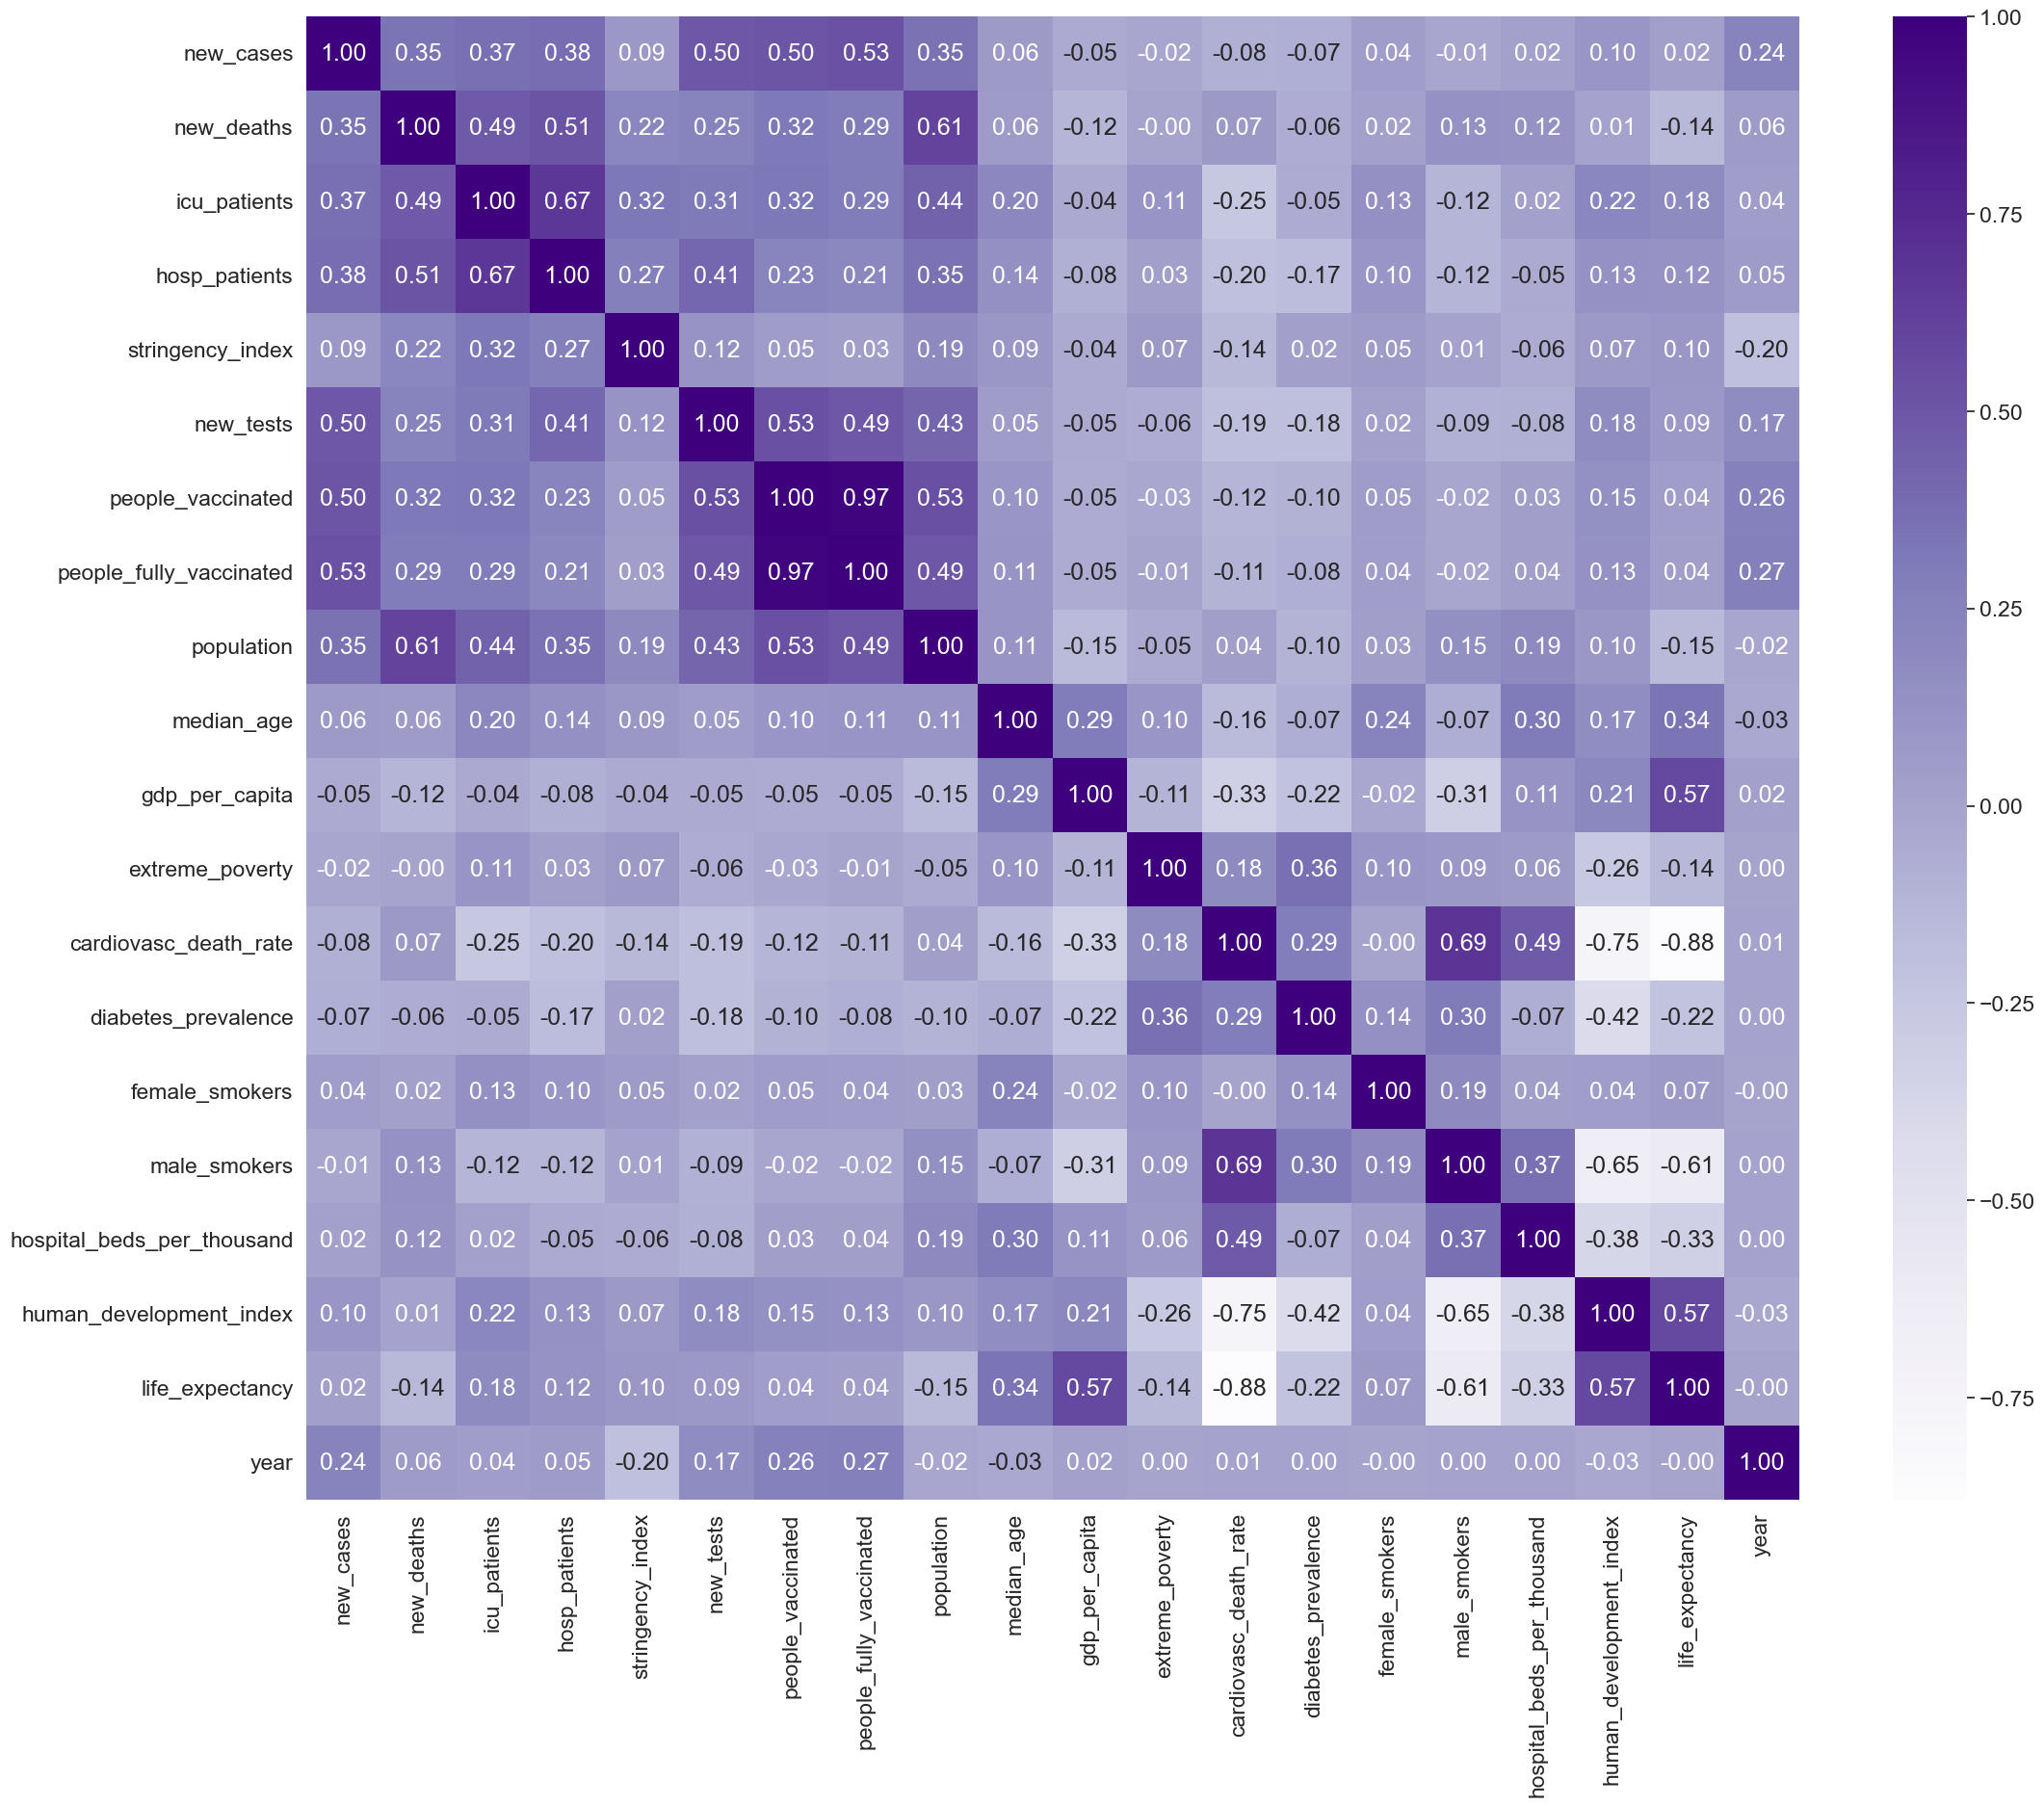

In [71]:
plt.figure(figsize = (25, 20))
sns.heatmap(dfeurope.corr(), cmap = 'Purples', annot = True, fmt = '.2f');

## <font color='blue'> Checking numeric variable outliers </font>

In [72]:
dfeurope.shape

(33464, 25)

In [73]:
new_deaths = dfeurope[dfeurope['new_deaths'] < 0]

In [74]:
new_deaths.shape

(78, 25)

In [75]:
dfeurope.loc[dfeurope['new_deaths'] < 0, 'new_deaths'] = 0
dfeurope.loc[dfeurope['new_cases'] < 0, 'new_cases'] = 0

In [76]:
dfeurope.describe()

,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,people_vaccinated,people_fully_vaccinated,population,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy,year
count,33464.000000,33464.000000,33464.000000,33464.000000,33464.000000,3.346400e+04,3.346400e+04,3.346400e+04,3.346400e+04,33464.000000,33464.000000,33464.000000,33464.000000,33464.000000,33464.000000,33464.000000,33464.000000,33464.000000,33464.000000,33464.000000
mean,4578.634831,50.832148,254.590396,1693.336421,53.736074,5.336600e+04,3.168993e+06,2.654365e+06,1.605334e+07,42.047992,42264.499313,0.902134,229.321376,6.546103,23.344409,35.460041,5.141942,0.871264,79.868161,2020.675203
std,18068.071903,138.840128,720.417050,4736.246361,15.713054,1.594842e+05,1.036603e+07,9.059426e+06,2.792702e+07,3.633179,35915.237002,1.015238,116.446976,1.919551,6.986744,9.691570,2.261628,0.058978,3.477177,0.609245
min,0.000000,0.000000,0.000000,0.000000,5.560000,0.000000e+00,0.000000e+00,0.000000e+00,3.369100e+04,30.000000,5189.972000,0.100000,86.060000,3.280000,5.900000,15.200000,2.220000,0.750000,71.900000,2020.000000
25%,36.000000,0.000000,0.000000,0.000000,42.590000,0.000000e+00,0.000000e+00,0.000000e+00,1.325188e+06,39.700000,23313.199000,0.200000,126.459000,5.180000,19.800000,28.900000,3.390000,0.816000,76.880000,2020.000000
50%,402.000000,5.000000,0.000000,39.000000,53.700000,4.986000e+03,0.000000e+00,0.000000e+00,5.465629e+06,42.500000,32605.906000,0.900000,227.485000,6.180000,23.000000,35.000000,4.690000,0.882000,81.320000,2021.000000
75%,2268.250000,30.000000,119.000000,843.250000,63.890000,2.861250e+04,5.691608e+05,4.407318e+05,1.072455e+07,44.000000,46682.515000,0.900000,322.688000,7.770000,27.400000,40.200000,6.560000,0.922000,82.400000,2021.000000
max,502507.000000,4614.000000,7019.000000,39255.000000,100.000000,2.945871e+06,7.828428e+07,7.160191e+07,1.459120e+08,53.000000,190512.000000,5.700000,539.849000,10.080000,44.000000,58.300000,13.800000,0.957000,86.750000,2022.000000


In [77]:
dfeurope.columns

Index(['iso_code', 'continent', 'location', 'date', 'new_cases', 'new_deaths',
       'icu_patients', 'hosp_patients', 'stringency_index', 'new_tests',
       'people_vaccinated', 'people_fully_vaccinated', 'population',
       'median_age', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'human_development_index',
       'life_expectancy', 'mounth', 'year'],
      dtype='object')

## <font color='blue'> Removing Outliers </font>

In [78]:
registros = np.array([True] * len(dfeurope))

In [79]:
np.count_nonzero(registros == True)

33464

In [80]:
np.count_nonzero(registros == False)

0

In [81]:
nums2 = ['new_cases', 'new_deaths',
       'icu_patients', 'hosp_patients', 'stringency_index', 'new_tests',
       'people_vaccinated', 'people_fully_vaccinated', 'population',
       'median_age', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'human_development_index',
       'life_expectancy']

In [82]:
for col in nums2:
    
  
    zscore = abs(stats.zscore(dfeurope[col])) 
    

    registros = (zscore < 3) & registros

In [83]:
dfeurope = dfeurope[registros] 

In [84]:
dfeurope.describe()

,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,people_vaccinated,people_fully_vaccinated,population,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy,year
count,26609.000000,26609.000000,26609.000000,26609.000000,26609.000000,26609.000000,2.660900e+04,2.660900e+04,2.660900e+04,26609.000000,26609.000000,26609.000000,26609.000000,26609.000000,26609.000000,26609.000000,26609.000000,26609.000000,26609.000000,26609.000000
mean,2001.105979,21.853283,111.583487,928.645458,52.488749,26447.639859,1.027423e+06,8.547532e+05,9.508947e+06,41.966635,37850.637126,0.690578,227.267592,6.453521,23.253828,35.292232,4.905033,0.874776,79.846394,2020.650945
std,5066.175793,49.446726,281.289898,2037.608873,15.695988,57839.403743,3.093699e+06,2.511068e+06,1.501136e+07,2.830121,21427.801543,0.383843,117.719647,1.913889,7.688531,10.005533,1.851914,0.058629,3.284017,0.606699
min,0.000000,0.000000,0.000000,0.000000,8.330000,0.000000,0.000000e+00,0.000000e+00,3.369100e+04,33.000000,5189.972000,0.100000,86.060000,3.280000,5.900000,15.200000,2.220000,0.750000,71.900000,2020.000000
25%,37.000000,0.000000,0.000000,0.000000,40.740000,0.000000,0.000000e+00,0.000000e+00,1.325188e+06,40.300000,24574.382000,0.200000,126.459000,5.180000,19.600000,27.800000,3.400000,0.823000,77.400000,2020.000000
50%,342.000000,3.000000,0.000000,80.000000,52.780000,5841.000000,0.000000e+00,0.000000e+00,5.449270e+06,42.500000,32605.906000,0.700000,175.695000,5.810000,23.000000,35.000000,4.530000,0.887000,81.320000,2021.000000
75%,1505.000000,18.000000,69.000000,770.000000,62.040000,23903.000000,3.749930e+05,2.223880e+05,1.016016e+07,43.900000,46682.515000,0.900000,304.195000,7.290000,28.200000,44.400000,5.800000,0.931000,82.280000,2021.000000
max,58616.000000,466.000000,2399.000000,15887.000000,100.000000,530626.000000,3.419697e+07,2.922128e+07,8.390047e+07,47.900000,94277.965000,2.000000,539.849000,10.080000,44.000000,52.700000,11.000000,0.957000,84.970000,2022.000000


## <font color='blue'> Feature Selection </font>

Here decisions will be made about which variables will be used in the predictive model based on the correlation map

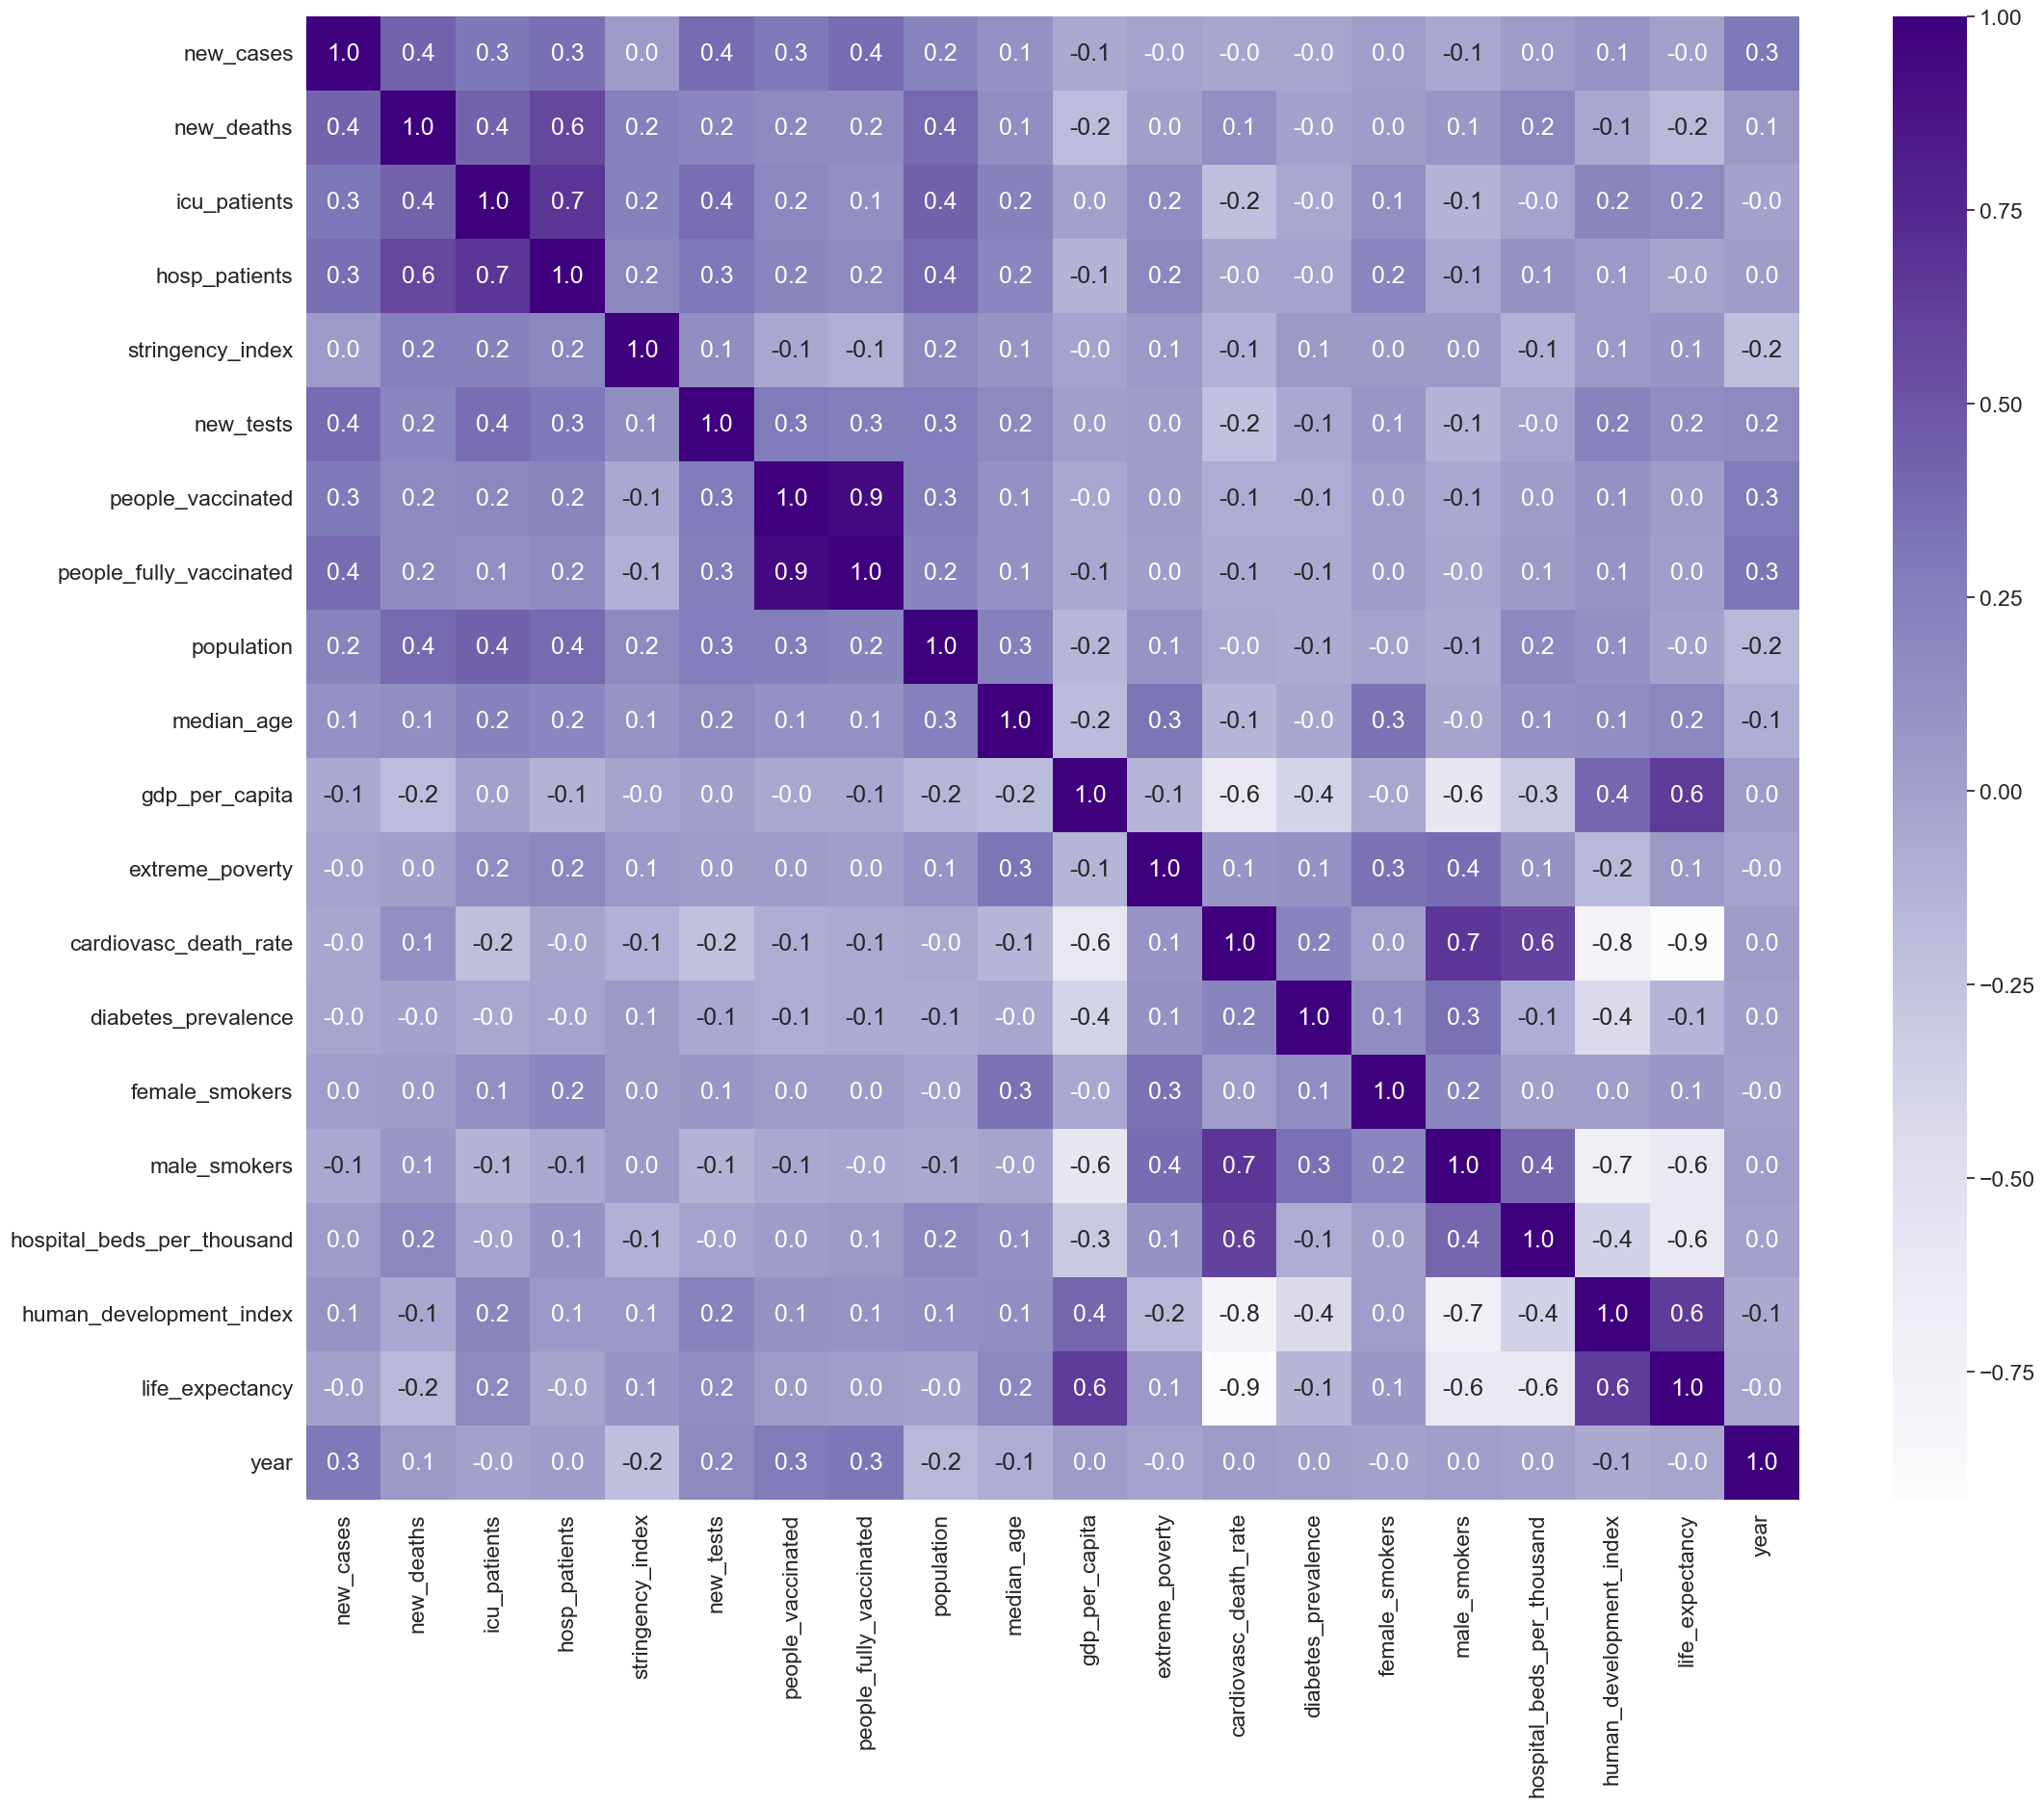

In [85]:
plt.figure(figsize = (25, 20))
sns.heatmap(dfeurope.corr(), cmap = 'Purples', annot = True, fmt = '.1f');

Creates a copy of the dataframe

In [86]:
df_europe = dfeurope.copy()

In [87]:
df_europe.sample(10)

,iso_code,continent,location,date,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy,mounth,year
82978,LVA,Europe,Latvia,2021-12-07,860.0,23.0,0.0,552.0,40.74,11804.0,...,0.7,350.060,4.91,25.6,51.0,5.570,0.866,75.29,December,2021
86676,LTU,Europe,Lithuania,2020-05-25,10.0,1.0,0.0,0.0,71.30,3915.0,...,0.7,342.989,3.67,21.3,38.0,6.560,0.882,75.93,May,2020
39177,CZE,Europe,Czechia,2022-01-13,0.0,0.0,388.0,2005.0,37.96,93930.0,...,0.9,227.485,6.82,30.5,38.3,6.630,0.900,79.38,January,2022
2041,ALB,Europe,Albania,2021-09-17,959.0,6.0,0.0,0.0,41.67,5106.0,...,1.1,304.195,10.08,7.1,51.2,2.890,0.795,78.57,September,2021
133688,SVK,Europe,Slovakia,2021-07-20,52.0,4.0,4.0,49.0,43.98,14556.0,...,0.7,287.959,7.29,23.1,37.7,5.820,0.860,77.54,July,2021
14569,BLR,Europe,Belarus,2022-02-09,8254.0,15.0,0.0,0.0,53.70,0.0,...,0.9,443.129,5.18,10.5,46.1,11.000,0.823,74.79,February,2022
68604,ISL,Europe,Iceland,2022-02-04,1394.0,2.0,0.0,21.0,35.19,5704.0,...,0.2,117.992,5.31,14.3,15.2,2.910,0.949,82.99,February,2022
141914,SWE,Europe,Sweden,2020-08-02,38.0,0.0,35.0,264.0,59.26,7576.0,...,0.5,133.982,4.79,18.8,18.9,2.220,0.945,82.80,August,2020
130633,SRB,Europe,Serbia,2021-11-15,3487.0,57.0,266.0,6411.0,40.74,15764.0,...,0.9,439.415,10.08,37.7,40.2,5.609,0.806,76.00,November,2021
50725,FRO,Europe,Faeroe Islands,2021-11-19,41.0,0.0,0.0,0.0,38.89,0.0,...,0.9,229.000,6.50,23.0,35.0,5.000,0.800,80.67,November,2021


In [88]:
df_europe['year'] = np.where(
        (df_europe['year'] == 2020), "0", 
    np.where(
        (df_europe['year'] == 2021), "1", 
    np.where(
        (df_europe['year'] == 2022), "2" , 'x')))

In [89]:
df_europe['mounth'].value_counts()

July         2414
August       2404
June         2385
May          2384
October      2369
September    2318
January      2232
December     2226
April        2166
November     2125
February     1826
March        1760
Name: mounth, dtype: int64

In [90]:
df_europe['mounth'] = np.where(
        (df_europe['mounth'] == 'January'), "1", 
    np.where(
        (df_europe['mounth'] == 'February'), "2", 
    np.where(
        (df_europe['mounth'] == 'March'), "3" ,
        np.where(
        (df_europe['mounth'] == 'April'), "4" ,
            np.where(
        (df_europe['mounth'] == 'May'), "5" ,
                np.where(
        (df_europe['mounth'] == 'June'), "6" ,
                    np.where(
        (df_europe['mounth'] == 'July'), "7" ,
                         np.where(
        (df_europe['mounth'] == 'August'), "8" ,
                        np.where(
        (df_europe['mounth'] == 'September'), "9" ,
                            np.where(
        (df_europe['mounth'] == 'October'), "10" ,
                                np.where(
        (df_europe['mounth'] == 'November'), "11" ,'12')))))))))))

In [91]:
df_europe.sample(10)

,iso_code,continent,location,date,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy,mounth,year
133291,SVK,Europe,Slovakia,2020-06-18,1.0,0.0,0.0,1.0,41.67,806.0,...,0.7,287.959,7.29,23.1,37.7,5.820,0.860,77.54,6,0
133459,SVK,Europe,Slovakia,2020-12-03,3645.0,32.0,125.0,1675.0,69.44,40097.0,...,0.7,287.959,7.29,23.1,37.7,5.820,0.860,77.54,12,0
120107,PRT,Europe,Portugal,2021-04-18,441.0,3.0,109.0,428.0,65.74,14429.0,...,0.5,127.842,9.85,16.3,30.0,3.390,0.864,82.05,4,1
112038,NOR,Europe,Norway,2021-11-02,1626.0,0.0,0.0,163.0,20.37,15683.0,...,0.2,114.316,5.31,19.6,20.7,3.600,0.957,82.40,11,1
105737,NLD,Europe,Netherlands,2021-09-25,1608.0,3.0,173.0,297.0,47.22,13376.0,...,0.9,109.361,5.29,24.4,27.3,3.320,0.944,82.28,9,1
38128,CYP,Europe,Cyprus,2021-02-22,107.0,0.0,18.0,76.0,80.56,34190.0,...,0.9,141.171,9.24,19.6,52.7,3.400,0.887,80.98,2,1
37816,CYP,Europe,Cyprus,2020-04-16,20.0,0.0,12.0,36.0,94.44,2905.0,...,0.9,141.171,9.24,19.6,52.7,3.400,0.887,80.98,4,0
99963,MNE,Europe,Montenegro,2020-07-17,678.0,2.0,0.0,0.0,53.70,0.0,...,1.0,387.305,10.08,44.0,47.9,3.861,0.829,76.88,7,0
3103,AND,Europe,Andorra,2020-08-23,0.0,0.0,0.0,0.0,41.67,0.0,...,0.9,109.135,7.97,29.0,37.8,5.000,0.868,83.73,8,0
14302,BLR,Europe,Belarus,2021-05-18,1179.0,10.0,0.0,0.0,42.59,0.0,...,0.9,443.129,5.18,10.5,46.1,11.000,0.823,74.79,5,1


In [92]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'new_cases', 'new_deaths',
       'icu_patients', 'hosp_patients', 'stringency_index', 'new_tests',
       'people_vaccinated', 'people_fully_vaccinated', 'population',
       'median_age', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'human_development_index',
       'life_expectancy', 'mounth', 'year'],
      dtype='object')

In [93]:
 # Escolhendo as variaveis numericas para o pre-processsamento
df_europe = df_europe [['new_cases', 'new_deaths',
       'icu_patients', 'hosp_patients', 'stringency_index', 'new_tests',
       'people_vaccinated', 'people_fully_vaccinated', 'population',
       'median_age', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'human_development_index',
       'life_expectancy', 'mounth', 'year']]

## <font color='blue'> Data Pre-Processing </font>

The purpose of Preprocessing is to leave the data in the ideal format for the next step within a Data Science project. Usually Preprocessing is the last step before training a Machine Learning model.

Some pre-processing techniques should be applied exclusively to training data

In [94]:
df_europe.dtypes

new_cases                     float64
new_deaths                    float64
icu_patients                  float64
hosp_patients                 float64
stringency_index              float64
new_tests                     float64
people_vaccinated             float64
people_fully_vaccinated       float64
population                    float64
median_age                    float64
gdp_per_capita                float64
extreme_poverty               float64
cardiovasc_death_rate         float64
diabetes_prevalence           float64
female_smokers                float64
male_smokers                  float64
hospital_beds_per_thousand    float64
human_development_index       float64
life_expectancy               float64
mounth                         object
year                           object
dtype: object

In [95]:
df_europe.sample(10)

,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,people_vaccinated,people_fully_vaccinated,population,median_age,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy,mounth,year
67439,4320.0,111.0,0.0,7278.0,72.22,22173.0,0.0,0.0,9634162.0,43.4,...,0.5,278.296,7.55,26.8,34.8,7.020,0.854,76.88,11,0
97932,1115.0,20.0,0.0,0.0,48.15,3690.0,0.0,0.0,4024025.0,37.6,...,0.2,408.502,5.72,5.9,44.6,5.800,0.750,71.90,11,0
3566,0.0,0.0,0.0,0.0,51.85,0.0,0.0,0.0,77354.0,46.0,...,0.9,109.135,7.97,29.0,37.8,5.000,0.868,83.73,11,1
3234,68.0,0.0,0.0,0.0,52.78,0.0,0.0,0.0,77354.0,46.0,...,0.9,109.135,7.97,29.0,37.8,5.000,0.868,83.73,1,1
23769,2426.0,208.0,674.0,6130.0,47.22,0.0,0.0,1808240.0,6896655.0,44.7,...,1.5,424.688,5.81,30.1,44.4,7.454,0.816,75.05,12,1
40143,94.0,0.0,4.0,23.0,50.93,39637.0,0.0,0.0,5813302.0,42.3,...,0.2,114.767,6.41,19.3,18.8,2.500,0.940,80.90,8,0
50431,0.0,0.0,0.0,0.0,27.78,0.0,3993.0,1.0,49053.0,37.0,...,0.9,229.000,6.50,23.0,35.0,5.000,0.800,80.67,1,1
153110,1024.0,21.0,0.0,0.0,50.93,0.0,3599167.0,2034113.0,43466822.0,41.4,...,0.1,539.849,7.11,13.5,47.4,8.800,0.779,72.06,8,1
86675,6.0,1.0,0.0,0.0,71.30,1940.0,0.0,0.0,2689862.0,43.5,...,0.7,342.989,3.67,21.3,38.0,6.560,0.882,75.93,5,0
86867,2110.0,34.0,0.0,1949.0,57.41,14720.0,0.0,0.0,2689862.0,43.5,...,0.7,342.989,3.67,21.3,38.0,6.560,0.882,75.93,12,0


Input variables (predictor variables)

In [96]:
X = df_europe[['new_cases',
       'icu_patients', 'hosp_patients', 'stringency_index', 'new_tests',
       'people_vaccinated', 'population',
       'median_age', 'cardiovasc_death_rate',
       'male_smokers', 'human_development_index',
       'life_expectancy', 'year']]

Output variable (target variable or target)

In [97]:
y = df_europe[['new_deaths']]

Splitting into training and test data

In [98]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [99]:
len(X_treino)

18626

In [100]:
len(X_teste)

7983

## <font color='blue'> Standardization </font>

In [101]:
scaler = StandardScaler()

In [102]:
scaler.fit(X_treino)

StandardScaler()

In [103]:
X_treino = scaler.transform(X_treino)

In [104]:
X_teste = scaler.transform(X_teste)

In [105]:
X_treino[:5]

array([[ 0.0441163 ,  0.33289474, -0.04817318, -0.04061416,  7.81859315,
        -0.32852961, -0.03046045,  0.86215726, -0.69860537, -0.44128978,
         0.80763806,  0.5157128 ,  0.5803858 ],
       [-0.39194779, -0.39593756, -0.45501951, -0.86842373, -0.45372241,
        -0.32852961, -0.62775087, -1.75213558,  0.01393666, -0.0317276 ,
        -1.27168019,  0.25106422,  0.5803858 ],
       [ 0.37820726, -0.39593756,  0.03339383, -0.39511595, -0.27970573,
         0.30092396, -0.45237545,  0.54420272,  0.9829758 ,  0.26795205,
         0.12589437, -1.19081424,  2.23156432],
       [-0.17847874,  1.25295533,  1.53323801, -0.15878142, -0.45372241,
        -0.32852961, -0.17300344,  0.9681421 ,  1.67751236,  0.90726862,
        -0.99898272, -1.45850476,  2.23156432],
       [-0.39075744, -0.39593756, -0.45501951,  2.02954852, -0.43428355,
        -0.32852961,  0.05771009,  1.18011179, -0.43921787,  1.66645706,
         0.22815592,  0.72864843, -1.07079273]])

In [106]:
X_teste[:5]

array([[-0.31437679, -0.15419615,  0.47385565,  0.25512337, -0.28217662,
         0.44274236, -0.17467085, -0.26834775,  1.802709  ,  0.48771712,
        -1.16941864, -1.16952068,  0.5803858 ],
       [-0.11003374, -0.39593756, -0.45501951, -0.51392195, -0.45372241,
        -0.32852961, -0.41428302,  0.19091991,  0.86945126,  1.23691623,
        -1.61255204, -0.7436494 ,  0.5803858 ],
       [-0.39194779, -0.39593756, -0.45501951,  0.0775531 , -0.45372241,
        -0.32852961, -0.62533641,  0.36756131,  0.01393666, -0.0317276 ,
        -1.27168019,  0.47312567, -1.07079273],
       [ 0.24389634,  1.90962601,  0.35125797,  1.91138126,  0.12436341,
        -0.32852961,  0.50945215,  0.43821788, -1.00313405, -0.80090536,
         1.18259709,  0.74081619,  0.5803858 ],
       [-0.34770653, -0.32016786, -0.3853168 , -0.57268621,  0.33613469,
        -0.32852961, -0.57150501, -1.64615073, -0.73271204,  1.73638231,
         0.21111233,  0.34536429,  0.5803858 ]])

## <font color='blue'> Construction, Training and Evaluation of Model 1 with Linear Regression (Benchmark) </font>

In [107]:
modelo_v1 = LinearRegression()

Training

In [108]:
modelo_v1.fit(X_treino, y_treino)

LinearRegression()

In [109]:
print('Coeficientes: \n', modelo_v1.coef_)

Coeficientes: 
 [[11.99408973  0.92365503 19.362308    8.24084841 -2.55869484 -0.23997669
   7.52480617  1.00557111  6.51202698 -1.09140504  0.2634347  -3.23309146
   1.34568199]]


Coefficients of predictor variables

In [110]:
df_coef = pd.DataFrame(modelo_v1.coef_.transpose(), X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
new_cases,11.994090
icu_patients,0.923655
hosp_patients,19.362308
stringency_index,8.240848
new_tests,-2.558695
people_vaccinated,-0.239977
population,7.524806
median_age,1.005571
cardiovasc_death_rate,6.512027
male_smokers,-1.091405


### Model Evaluation

Predictions with test data

In [111]:
pred_v1 = modelo_v1.predict(X_teste)

Prints the first 10 predictions

In [112]:
pred_v1[:10]

array([[43.56632752],
       [12.36531296],
       [ 2.19511778],
       [46.02502401],
       [-8.62032089],
       [-4.46656907],
       [15.71035683],
       [15.05734946],
       [37.40664732],
       [12.92515961]])

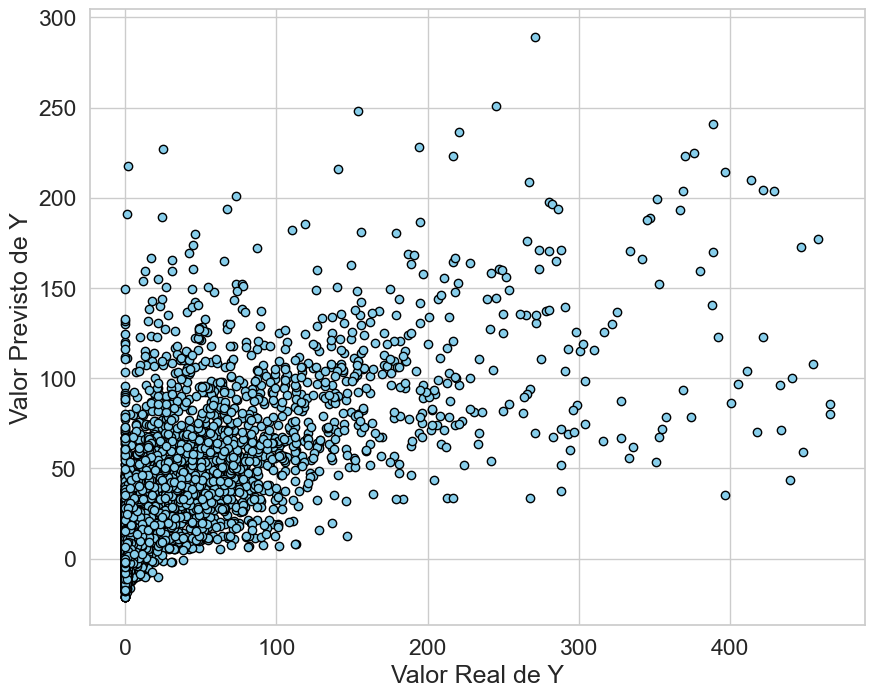

In [113]:
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v1, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

MAE - Mean Absolute Error

In [114]:
mean_absolute_error(y_teste, pred_v1)

18.39030745917716

MSE - Mean Squared Error

In [115]:
mean_squared_error(y_teste, pred_v1)

1326.0611268058578

RMSE - Square root mean square error

In [116]:
np.sqrt(mean_squared_error(y_teste, pred_v1))

36.41512222697952

R2 coefficient

In [117]:
r2_score(y_teste, pred_v1)

0.4810205258995145

Explained Variance

In [118]:
explained_variance_score(y_teste, pred_v1)

0.48102053336978967

* Our model is able to explain 48% of the data variance.

* The 48% R2 coefficient and the other metrics. Can this performance be improved?

### Waste

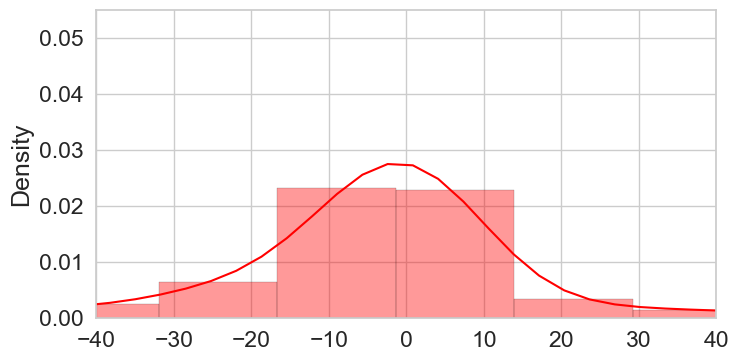

In [119]:
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v1), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

## <font color='blue'> Construction, Training and Evaluation of Model 2 with Ridge Regression </font>

In [120]:
modelo_v2 = Ridge(alpha = 1.0)

In [121]:
modelo_v2.fit(X_treino, y_treino)

Ridge()

In [122]:
print('Coeficientes: \n', modelo_v2.coef_)

Coeficientes: 
 [[11.99356972  0.92494205 19.36057325  8.24034441 -2.55827814 -0.23976234
   7.52447393  1.00577648  6.50954183 -1.09131205  0.26246931 -3.23485247
   1.34553829]]


Coefficients of predictor variables

In [123]:
df_coef = pd.DataFrame(modelo_v2.coef_.transpose(), X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
new_cases,11.993570
icu_patients,0.924942
hosp_patients,19.360573
stringency_index,8.240344
new_tests,-2.558278
people_vaccinated,-0.239762
population,7.524474
median_age,1.005776
cardiovasc_death_rate,6.509542
male_smokers,-1.091312


Predictions with test data

In [124]:
pred_v2 = modelo_v2.predict(X_teste)
pred_v2[:10]

array([[43.56399262],
       [12.36656355],
       [ 2.19609683],
       [46.02557316],
       [-8.61858668],
       [-4.46465744],
       [15.71155969],
       [15.05748455],
       [37.40547148],
       [12.92670954]])

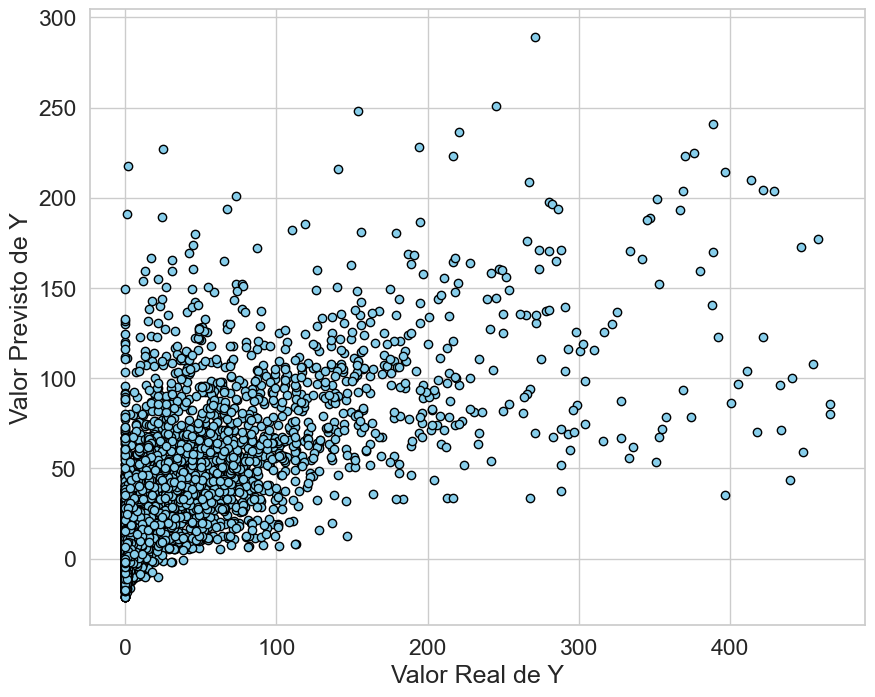

In [125]:
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v2, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [126]:
mean_absolute_error(y_teste, pred_v2)

18.390168771739653

In [127]:
mean_absolute_error(y_teste, pred_v2)

18.390168771739653

In [128]:
np.sqrt(mean_squared_error(y_teste, pred_v2))

36.41515524784985

In [129]:
r2_score(y_teste, pred_v2)

0.481019584688246

In [130]:
explained_variance_score(y_teste, pred_v2)

0.4810195921505538

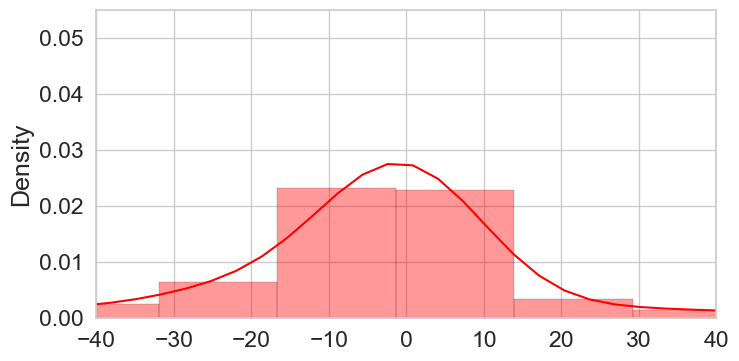

In [131]:
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v2), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

## <font color='blue'> Selection of Model </font>

* Models 1 and 2 were very close and in this case we should choose the simplest model, in this case it is model 1.

## <font color='blue'> Coefficient Interpretations: </font>

In [132]:
df_coef_final = pd.DataFrame(modelo_v1.coef_.transpose(), X.columns, columns = ['Coeficiente'])
df_coef_final

,Coeficiente
new_cases,11.994090
icu_patients,0.923655
hosp_patients,19.362308
stringency_index,8.240848
new_tests,-2.558695
people_vaccinated,-0.239977
population,7.524806
median_age,1.005571
cardiovasc_death_rate,6.512027
male_smokers,-1.091405



* Holding all other features fixed, a 1 unit increase in the number of New confirmed COVID-19 cases is associated with an increase of 11 Covid 19 deaths on average.


* Holding all other features fixed, a 1-unit increase in the number of COVID-19 patients in intensive care units (ICUs) on a given day is associated with an increase of 1 COVID-19 death on average.


* Holding all other features fixed, a 1-unit increase in the Number of COVID-19 patients in the hospital on a given day is associated with an increase of 19 COVID-19 deaths on average.


* Keeping all other features fixed, a 1-unit increase in the Number of New COVID-19 tests is associated with a decrease of 2 COVID-19 deaths on average.


* Keeping all other features fixed, 1 unit increase in Total number of people who received at least one dose of vaccine is associated with 0 deaths from covid 19 on average.


* Keeping all other resources fixed, 1 unit increase in Population Number is associated with an increase of 7 deaths from covid 19 on average.


* Holding all other features fixed, a 1 unit increase in the Cardiovascular Disease Death Rate is associated with an average increase of 6 Covid 19 deaths.


* Keeping all other resources fixed, a 1-unit increase in the proportion of men who smoke is associated with a decrease of 1 death from Covid-19 on average.


* Keeping all other resources fixed, a 1 unit increase in the Number of the composite index that measures average performance in three basic dimensions of human development – ​​a long and healthy life, knowledge and a decent standard of living is associated with 0 deaths from covid 19 on average.

* Keeping all other resources fixed, the increase of 1 unit in the Number of the index that measures life expectancy is associated with a decrease of 3 deaths from covid 19 on average.


## <font color='blue'> What has influenced the increase in the number of deaths from covid 19 on the European continent:

Based on the analysis of the linear regression coefficients, we can state that the increase:
* The number of new cases of Covid;
* From patients with COVID-19 in intensive care units (ICUs);
* From patients with COVID-19 in the hospital;
* From Population of the country;
* Cardiovascular disease mortality rate;

It has contributed a lot to a significant increase in the number of deaths from covid 19 in Europe.


While an increase

* Number of new tests for COVID-19;
* From people who received at least one dose of vaccine;
* The index that measures life expectancy;
* From the composite index measuring average performance in three basic dimensions of human development – ​​a long and healthy life, knowledge and a decent standard of living;

They contribute to the decrease in the number of deaths by covid 19.
